<img src="100_rides/peloton-logo-720x200.png" align="left" height="50%" width="50%"/><br/>
<br><br><br><br><br>

<img src="100_rides/100club.png" align="center" height="80%" width="80%"/><br/>

Anyone who is familiar with Peloton knows that completing your first one hundred rides and achieving that century club milestone is something to be proud of and a strong indicator that you've successfully made the bike a part of your fitness habits and routine.

In addition to reveling in the high fives from other riders and redeeming my free t-shirt from Peloton, I also wanted to take the moment to take an analytical look at my fitness progression on the bike so far.

Thankfully, Peloton makes this fairly easy by allowing you to download your workout data in CSV format. The downloaded statistics are not as detailed as the individual timeseries data you can inspect on each individual ride but should prove sufficient for a high level look.

Here are some questions I looked into and sought to answer by analyzing the data available.

First some high-level totals...

- What were the total number of classes I completed during the past three and half months (aside from the 100 cycling rides)?
- How much time have I logged working out with Peloton?
- How many miles did I cycle during the first 100 rides?

Next, lets discover or quantize some preferences...
- How did my class duration preferneces and completion stats pan out?
- Did I prefer taking Live or On-Demand rides?
- What class length did I prefer most often?


Some things we want to look at...

- Totals during the time periods (time spent, number of workouts, mileage cycled, etc)

- Distribution of class types (strength, cycling, etc)
- Distribution of Instructors (who did I work out with most often and who pushed me hardest?)
- Distribution of class lengths (ignore short 5 min, but between 20, 30, 45)
- Distribution of Time of Day (hour class started)
- Distribution of Live vs On-Demand

Then let's start looking at progression in cycling
- Avg Resistance
- Avg Cadence (RPM) 
- Average Speed
- Avg Watts
- Total Output (normalized per minute)
- Distance (mi) (normalized per minute)
- Calories Burned (normalized per minute)
- Average Heartrate

Then repeat the above on a per 15, 20, 30, 45 minute class breakdown.


Let's start with importing the required packages for analysis and loading workout data CSV file downloaded from peloton...

In [1]:
#TODO List
# https://www.onepeloton.com/instructors/bike/liv_amato

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import nltk
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
pelo_colors = ["#ff3347", "#5a6474", "#d2d5d9", "#e4e7eb", "#f5f7f9", "#406599", "#000000"]
sns.set_palette(pelo_colors, n_colors=None, desat=None, color_codes=False)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv("100_rides/century_club_workouts.csv")
df.head(5)

,Workout Timestamp,Live/On-Demand,Instructor Name,Length (minutes),Fitness Discipline,Type,Title,Class Timestamp,Total Output,Avg. Watts,Avg. Resistance,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Calories Burned,Avg. Heartrate,Avg. Incline,Avg. Pace (min/mi)
0,2020-10-03 11:23 (EST),On Demand,Leanne Hainsby,20,Cycling,Beginner,20 min Beginner Ride,2020-09-10 01:00 (EST),115.0,96.0,38%,79.0,15.58,5.19,158.0,NaN,NaN,NaN
1,2020-10-04 10:09 (EST),On Demand,Jess King,20,Cycling,Beginner,20 min Beginner Ride,2017-05-30 15:07 (EST),117.0,97.0,37%,82.0,15.71,5.23,160.0,NaN,NaN,NaN
2,2020-10-04 10:32 (EST),On Demand,Leanne Hainsby,5,Stretching,Pre & Post-Ride Stretch,5 min Post-Ride Stretch,2020-09-19 10:45 (EST),NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN
3,2020-10-05 09:31 (EST),On Demand,Matt Wilpers,5,Cycling,Beginner,5 min Intro to Peloton Part 1,2017-06-28 11:00 (EST),16.0,54.0,27%,74.0,11.49,0.96,22.0,NaN,NaN,NaN
4,2020-10-05 09:38 (EST),On Demand,Matt Wilpers,5,Stretching,Pre & Post-Ride Stretch,5 min Post-Ride Stretch,2020-09-21 17:00 (EST),NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN


In [4]:
df.describe()

,Length (minutes),Total Output,Avg. Watts,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Calories Burned,Avg. Heartrate,Avg. Incline,Avg. Pace (min/mi)
count,263.000000,105.000000,101.000000,101.000000,105.000000,105.000000,226.000000,127.000000,0.0,0.0
mean,12.851711,146.533333,111.960396,76.227723,16.493333,5.691810,151.154867,134.141811,NaN,NaN
std,10.144230,96.911048,34.643880,7.326501,2.369969,3.444852,160.747692,18.036577,NaN,NaN
min,5.000000,11.000000,36.000000,54.000000,9.970000,0.830000,15.000000,93.580000,NaN,NaN
25%,5.000000,55.000000,87.000000,73.000000,15.270000,2.580000,49.000000,120.845000,NaN,NaN
50%,10.000000,138.000000,116.000000,77.000000,17.120000,5.500000,65.000000,130.040000,NaN,NaN
75%,20.000000,221.000000,141.000000,81.000000,18.330000,8.690000,213.750000,147.220000,NaN,NaN
max,60.000000,396.000000,178.000000,102.000000,19.990000,14.000000,809.000000,171.020000,NaN,NaN


In [5]:
df.groupby(["Fitness Discipline"]).sum()

,Length (minutes),Total Output,Avg. Watts,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Calories Burned,Avg. Heartrate,Avg. Incline,Avg. Pace (min/mi)
Fitness Discipline,,,,,,,,,,
Bike Bootcamp,120,536.0,0.0,0.0,71.16,19.23,1532.0,566.75,0.0,0.0
Cycling,2040,14850.0,11308.0,7699.0,1660.64,578.41,25592.0,8276.58,0.0,0.0
Meditation,305,0.0,0.0,0.0,0.00,0.00,42.0,109.59,0.0,0.0
Strength,465,0.0,0.0,0.0,0.00,0.00,3753.0,2596.97,0.0,0.0
Stretching,430,0.0,0.0,0.0,0.00,0.00,3138.0,5486.12,0.0,0.0
Walking,20,0.0,0.0,0.0,0.00,0.00,104.0,0.00,0.0,0.0


In [6]:
class_counts = df.groupby(["Fitness Discipline"])["Fitness Discipline"].count().sort_values(ascending=False).to_frame()
class_counts

,Fitness Discipline
Fitness Discipline,
Cycling,101
Stretching,78
Strength,40
Meditation,38
Bike Bootcamp,4
Walking,2


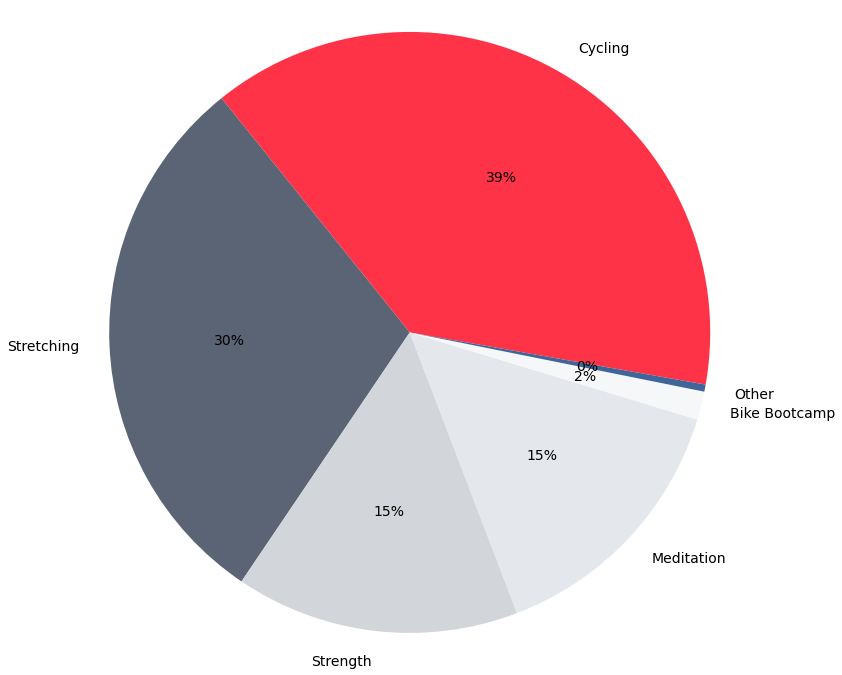

In [7]:
#class_counts = df.groupby(["Fitness Discipline"])["Fitness Discipline"].count().sort_values(ascending=False).head(5).to_frame()
#plot = class_counts.plot.pie(y='Fitness Discipline', figsize=(12, 24))

other_cnt = df.groupby(["Fitness Discipline"])["Fitness Discipline"].count().sort_values(ascending=True).head(-5).to_frame().count()[0]
i_cnt = df.groupby(["Fitness Discipline"])["Fitness Discipline"].count().sort_values(ascending=False).head(5)
i_cnt["Other"] = other_cnt

i_cnt = pd.DataFrame({"Fitness Discipline":i_cnt.index, "Count":i_cnt.values}).reset_index(drop=True) 

labels = i_cnt["Fitness Discipline"]
sizes = i_cnt["Count"]
explode = (0.0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(12, 12))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=-10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("100_rides/metric_discipline_pref.png", format="png")
plt.show()

In [8]:
i_cnt = df.groupby(["Instructor Name"])["Instructor Name"].count().sort_values(ascending=False).to_frame()
i_cnt

,Instructor Name
Instructor Name,
Olivia Amato,57
Cody Rigsby,21
Alex Toussaint,20
Emma Lovewell,14
Jess King,14
Ally Love,11
Matt Wilpers,11
Ross Rayburn,10
Chelsea Jackson Roberts,10


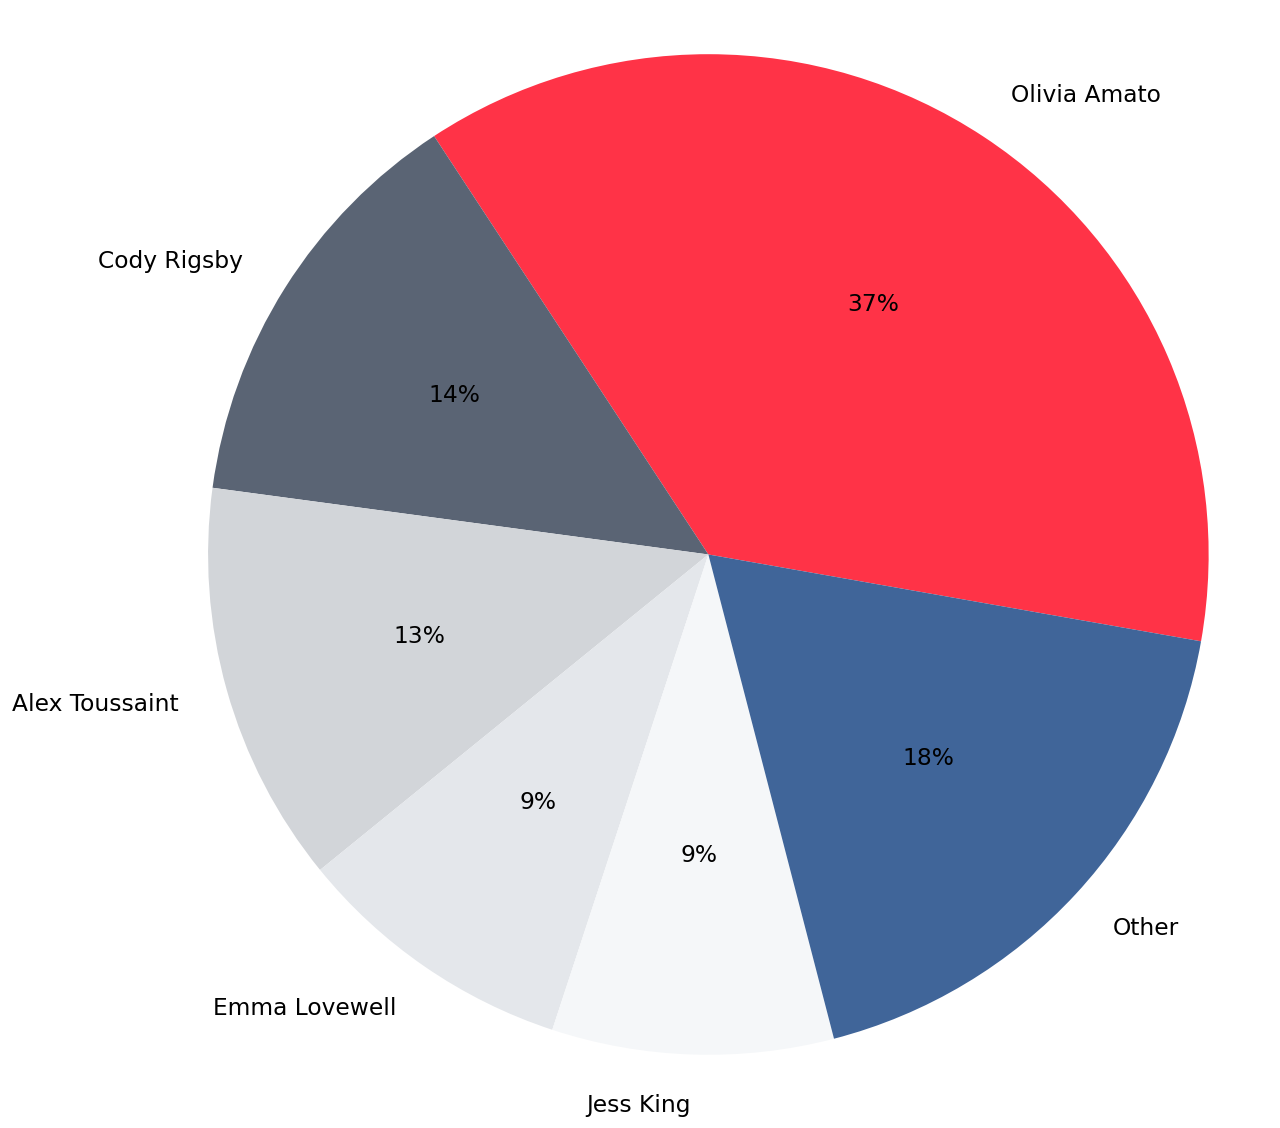

In [9]:
other_cnt = df.groupby(["Instructor Name"])["Instructor Name"].count().sort_values(ascending=True).head(-5).to_frame().count()[0]
i_cnt = df.groupby(["Instructor Name"])["Instructor Name"].count().sort_values(ascending=False).head(5)
i_cnt["Other"] = other_cnt

i_cnt = pd.DataFrame({"Instructor":i_cnt.index, "Count":i_cnt.values}).reset_index(drop=True) 

labels = i_cnt["Instructor"]
sizes = i_cnt["Count"]
explode = (0.0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(12, 12), dpi= 120)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=-10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("100_rides/metric_instructor_pref.png", format="png")
plt.show()

text tect text

### Workout Class Length

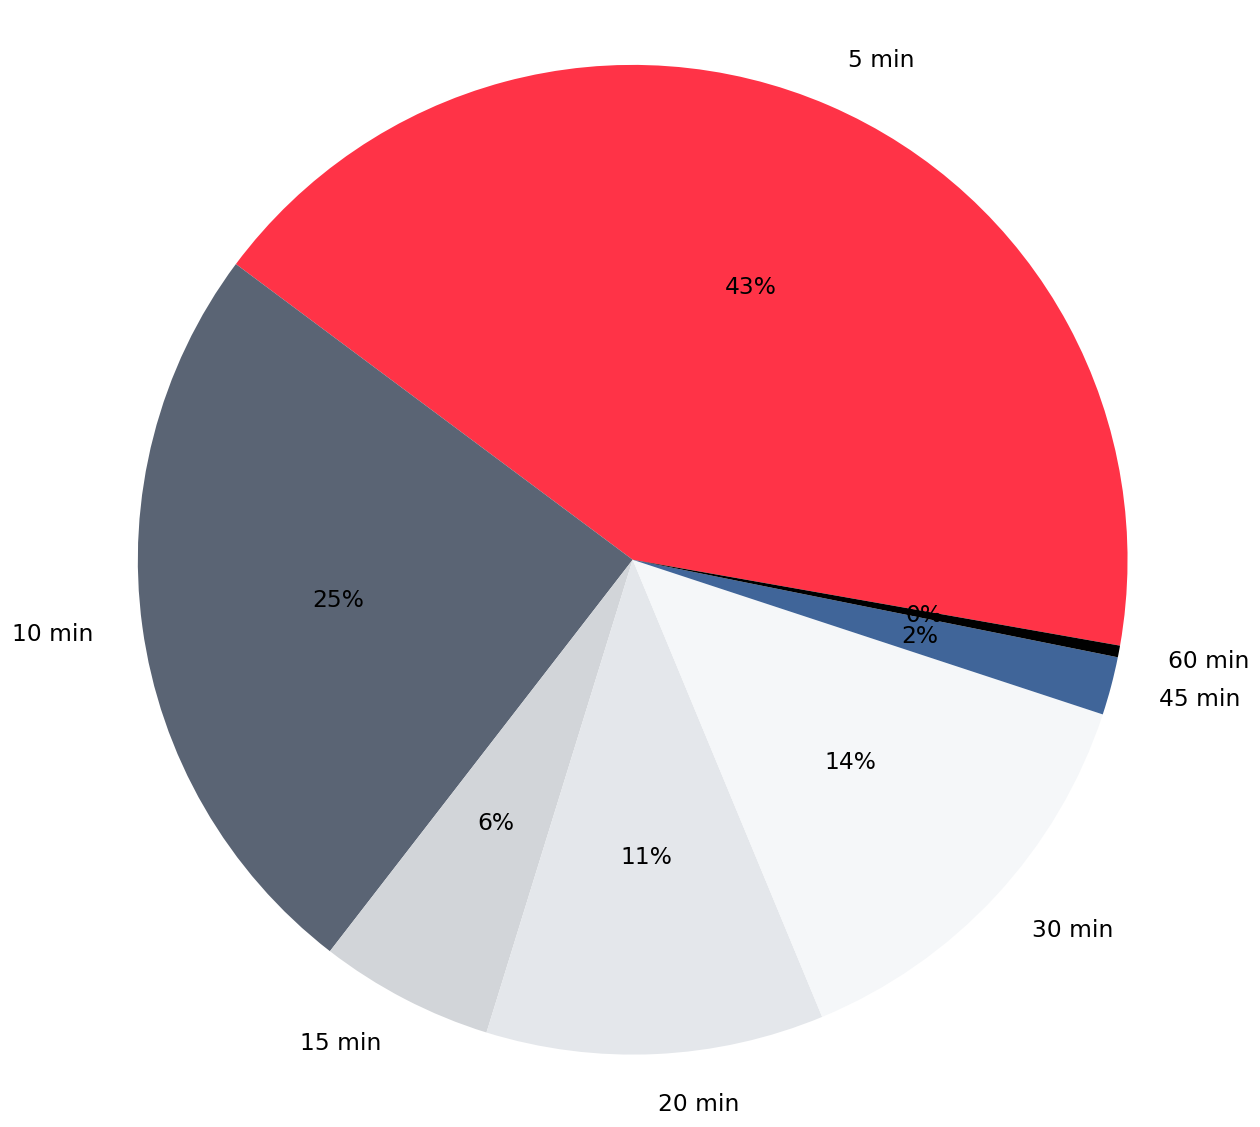

,Length (minutes),Count
0,5,112
1,10,65
2,15,15
3,20,29
4,30,36
5,45,5
6,60,1


In [10]:
l_cnt = df.groupby(["Length (minutes)"])["Length (minutes)"].count()
l_cnt = pd.DataFrame({"Length (minutes)":l_cnt.index, "Count":l_cnt.values}).reset_index(drop=True) 

labels = []
for label in l_cnt["Length (minutes)"]:
    labels.append(str(label)+" min")
sizes = l_cnt["Count"]
explode = (0.0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(12, 12), dpi= 120)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=-10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("100_rides/metric_length_pref.png", format="png")
plt.show()

l_cnt

I'm not surprised to see the vast majority of my classes being 5 or 10 minutes in length. Almost every real cycling workout is followed by a 5 or 10 minute stretch and sometimes a 5 or 10 minute cool down ride as well. Additionally, many of the strength and meditation classes that I complete are 5 or 10 minutes in length.

If we make the assumption that any workouts greater than 10 minutes are true efforts (particularly for cycling), then we can see that I strongly prefer to take 30 or 20 minute classes. 

### Did I prefer to take Live or On-Demand classes?

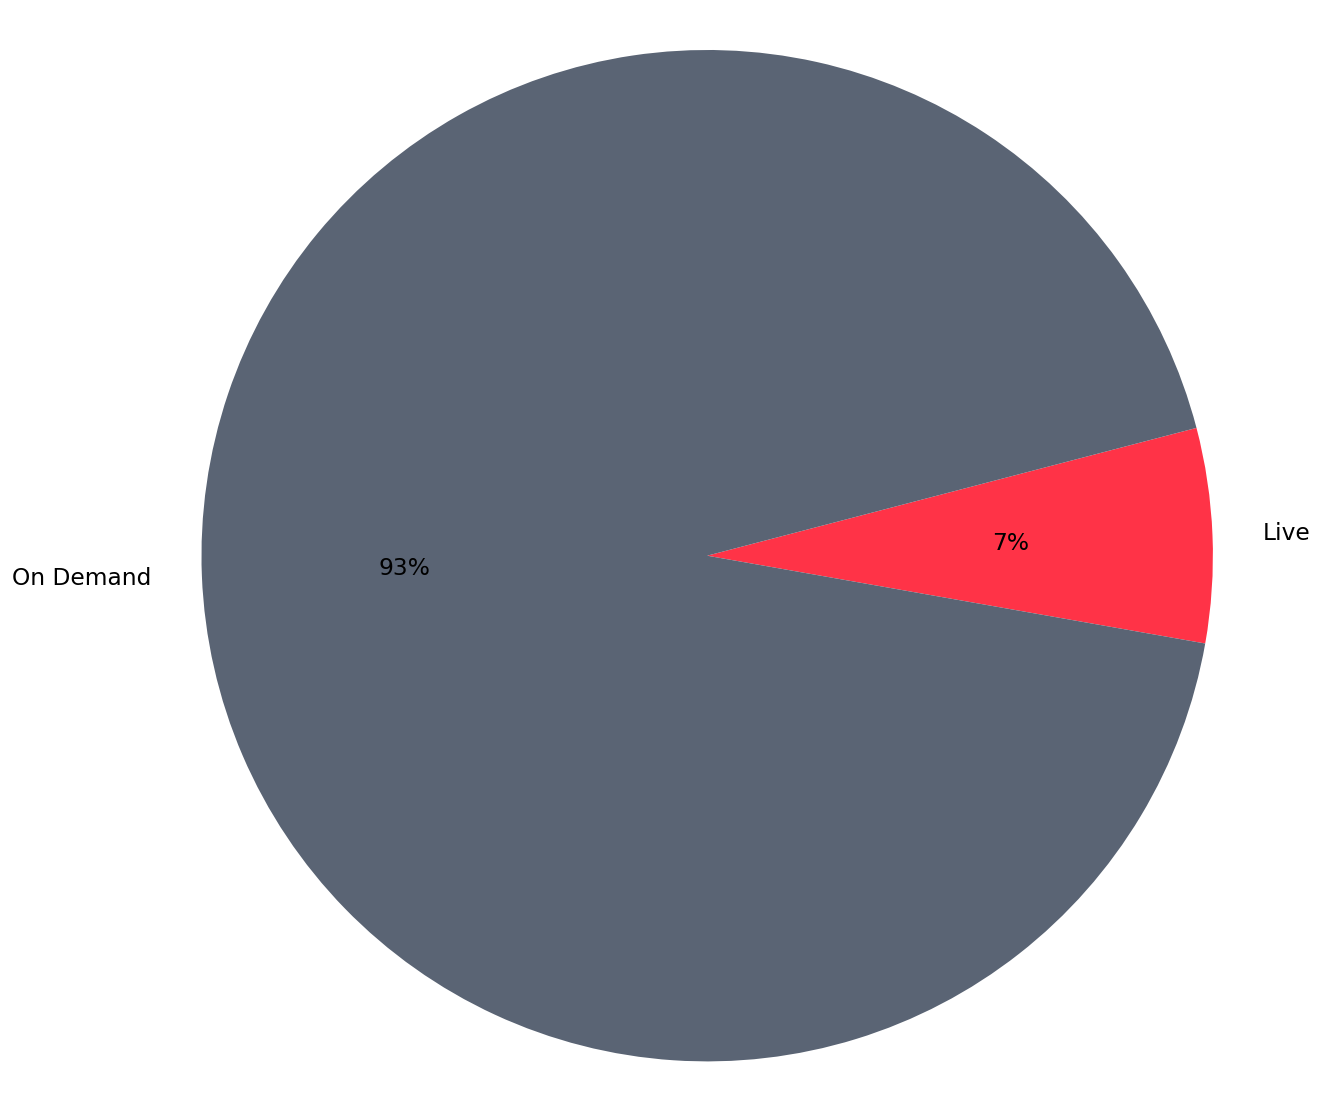

,Live/On-Demand,Count
0,Live,18
1,On Demand,245


In [11]:
live_od_counts = df.groupby(["Live/On-Demand"])["Live/On-Demand"].count().to_frame()
live_od_counts


lo_cnt = df.groupby(["Live/On-Demand"])["Live/On-Demand"].count()
lo_cnt = pd.DataFrame({"Live/On-Demand":lo_cnt.index, "Count":lo_cnt.values}).reset_index(drop=True) 

labels = lo_cnt["Live/On-Demand"]
sizes = lo_cnt["Count"]
explode = (0.0, 0)

fig1, ax1 = plt.subplots(figsize=(12, 12), dpi= 120)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=-10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("100_rides/metric_live_on_demand_pref.png", format="png")
plt.show()

lo_cnt

A lot of people rave about the benefits of live classes with Peloton. They primarily point to the possibility of a shoutout from the instructor when hitting a milestone and the ability to compete with your friends to communities on a live leaderboard.

Personally, I prefer to take the classes I want to take on my own schedule, race against my previous leaderboard personal best record instead of others, and avoid the occasional buffering issues of a live class. I'm surprised I took more than 10 live classes during the past three and half months.

### What time of day did I work out most often?

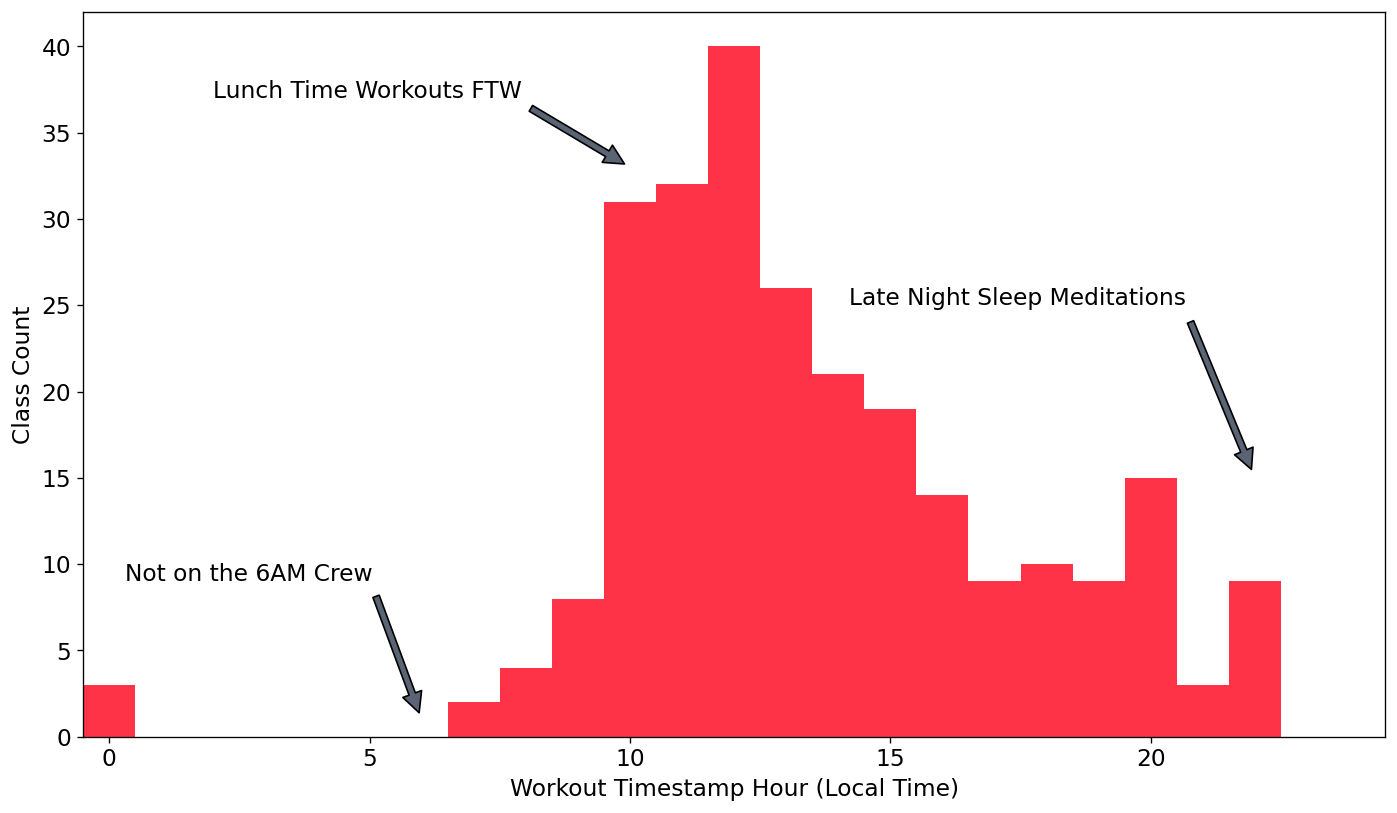

In [12]:
hour_markers = df["Workout Timestamp"].to_numpy()
hrs = []
for tm in hour_markers:
    hrs.append(int(tm[11:13]))
hrs = np.sort(hrs)

f, ax = plt.subplots(figsize=(14, 8), dpi= 120, facecolor='w', edgecolor='k')

plt.hist(hrs, bins=np.arange(24)-0.5, color=pelo_colors[0])
plt.xlim((-0.5,24.5))
plt.ylabel("Class Count")
plt.xlabel("Workout Timestamp Hour (Local Time)")
#plt.title("When do I most frequently work out?")
ax.annotate("Not on the 6AM Crew", xy=(6, 1), xytext=(0.3,9), arrowprops=dict(facecolor=pelo_colors[1], shrink=0.05))
ax.annotate("Lunch Time Workouts FTW", xy=(10,33), xytext=(2,37), arrowprops=dict(facecolor=pelo_colors[1], shrink=0.05))
ax.annotate("Late Night Sleep Meditations", xy=(22,15), xytext=(14.2,25), arrowprops=dict(facecolor=pelo_colors[1], shrink=0.05))
plt.savefig("100_rides/metric_time_of_day.png", format="png")
plt.show()

Then let's start looking at progression in cycling
- Total Output (KJ)
- Average Watts (W)
- Average Speed (miles per hour)
- Distance (miles)
- Calories Burned (kcal)
- Average Resistance (0% -100%)
- Average Cadence (RPM)
- Average Heart Rate

Then repeat the above on a per 15, 20, 30, 45 minute class breakdown.

All cycling classes ten minutes or five minutes in length are warm up or cool down rides. Including them would likely detract from the trends in the longer actual cycling classes where we are hoping to see physical progression.

In [13]:
ccc = df.loc[(df['Fitness Discipline'] == "Cycling") & (df['Length (minutes)'] >= 11)]  # all cycling classes longer than 10 minutes
c15 = df.loc[(df['Fitness Discipline'] == "Cycling") & (df['Length (minutes)'] == 15)]
c20 = df.loc[(df['Fitness Discipline'] == "Cycling") & (df['Length (minutes)'] == 20)]
c30 = df.loc[(df['Fitness Discipline'] == "Cycling") & (df['Length (minutes)'] == 30)]
c45 = df.loc[(df['Fitness Discipline'] == "Cycling") & (df['Length (minutes)'] == 45)]
c60 = df.loc[(df['Fitness Discipline'] == "Cycling") & (df['Length (minutes)'] == 60)]

In [14]:
cccn = ccc[["Workout Timestamp", "Total Output", "Avg. Watts", "Avg. Speed (mph)", "Distance (mi)", "Calories Burned", "Avg. Resistance", "Avg. Cadence (RPM)", "Avg. Heartrate"]].to_numpy()
c15n = c15[["Workout Timestamp", "Total Output", "Avg. Watts", "Avg. Speed (mph)", "Distance (mi)", "Calories Burned", "Avg. Resistance", "Avg. Cadence (RPM)", "Avg. Heartrate"]].to_numpy()
c20n = c20[["Workout Timestamp", "Total Output", "Avg. Watts", "Avg. Speed (mph)", "Distance (mi)", "Calories Burned", "Avg. Resistance", "Avg. Cadence (RPM)", "Avg. Heartrate"]].to_numpy()
c30n = c30[["Workout Timestamp", "Total Output", "Avg. Watts", "Avg. Speed (mph)", "Distance (mi)", "Calories Burned", "Avg. Resistance", "Avg. Cadence (RPM)", "Avg. Heartrate"]].to_numpy()
c45n = c45[["Workout Timestamp", "Total Output", "Avg. Watts", "Avg. Speed (mph)", "Distance (mi)", "Calories Burned", "Avg. Resistance", "Avg. Cadence (RPM)", "Avg. Heartrate"]].to_numpy()
c60n = c60[["Workout Timestamp", "Total Output", "Avg. Watts", "Avg. Speed (mph)", "Distance (mi)", "Calories Burned", "Avg. Resistance", "Avg. Cadence (RPM)", "Avg. Heartrate"]].to_numpy()

In [15]:
def date_array(dfn):
    date_objs = []
    for row in range(0, int(np.shape(dfn)[0])):
        date_objs.append(datetime.strptime(dfn[row,0][:-6], '%Y-%m-%d %H:%M'))
    return date_objs

In [16]:
def best_fit(dates, vals, order, c_idx):
    x = mdates.date2num(dates).astype(dtype='float')
    y = vals.astype(dtype='float')
    coefficients = np.polyfit(x, y, order)
    poly = np.poly1d(coefficients)
    
    new_x = np.linspace(x[0], x[-1])
    new_y = poly(new_x)
    
    new_x = mdates.num2date(new_x)
    
    plt.plot(new_x, new_y, color=pelo_colors[c_idx])
    
    return new_x, new_y

In [17]:
cccd = date_array(cccn)
c15d = date_array(c15n)
c20d = date_array(c20n)
c30d = date_array(c30n)
c45d = date_array(c45n)
c60d = date_array(c60n)

In [18]:
def plot_no_normalized(xlabel="Workout Timestamp", ylabel=" ", title=" ", data_idx=1):
    f, ax = plt.subplots(figsize=(14, 8), dpi= 120, facecolor='w', edgecolor='k')
    plt.scatter(cccd, cccn[:,data_idx], label="All", color=pelo_colors[6])
    plt.scatter(c15d, c15n[:,data_idx], label="15 min", color=pelo_colors[3])
    #best_fit(c15d, c15n[:,data_idx], 1, 3)
    plt.scatter(c20d, c20n[:,data_idx], label="20 min", color=pelo_colors[1])
    #best_fit(c20d, c20n[:,data_idx], 2, 1)
    plt.scatter(c30d, c30n[:,data_idx], label="30 min", color=pelo_colors[0])
    #best_fit(c30d, c30n[:,data_idx], 2, 0)
    plt.scatter(c45d, c45n[:,data_idx], label="45 min", color=pelo_colors[2])
    #best_fit(c45d, c45n[:,data_idx], 2  # not enough data
    plt.scatter(c60d, c60n[:,data_idx], label="60 min", color=pelo_colors[4])
    #best_fit(c60d, c60n[:,data_idx], 4) # not enough data
    #best_fit(cccd, cccn[:,data_idx], 2, 6) # all data
    
    plt.legend(loc='upper left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.title(title)
    plt.savefig("100_rides/metric_"+title.replace(" ", "_")+".png", format="png")
    plt.show()
    
def plot_normalized(xlabel="Workout Timestamp", ylabel=" ", title=" ", data_idx=1):
    f, ax = plt.subplots(figsize=(14, 8), dpi= 120, facecolor='w', edgecolor='k')
    plt.scatter(c15d, c15n[:,data_idx]/15.0, label="15 min", color=pelo_colors[3])
    plt.scatter(c20d, c20n[:,data_idx]/20.0, label="20 min", color=pelo_colors[1])
    plt.scatter(c30d, c30n[:,data_idx]/30.0, label="30 min", color=pelo_colors[0])
    plt.scatter(c45d, c45n[:,data_idx]/45.0, label="45 min", color=pelo_colors[2])
    plt.scatter(c60d, c60n[:,data_idx]/55.0, label="60 min", color=pelo_colors[4])  # the one 60min class was actually 55 min
    plt.legend(loc='upper left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.title(title)
    plt.savefig("100_rides/metric_"+title.replace(" ", "_")+".png", format="png")
    plt.show()

### Total Output Power [KJ]

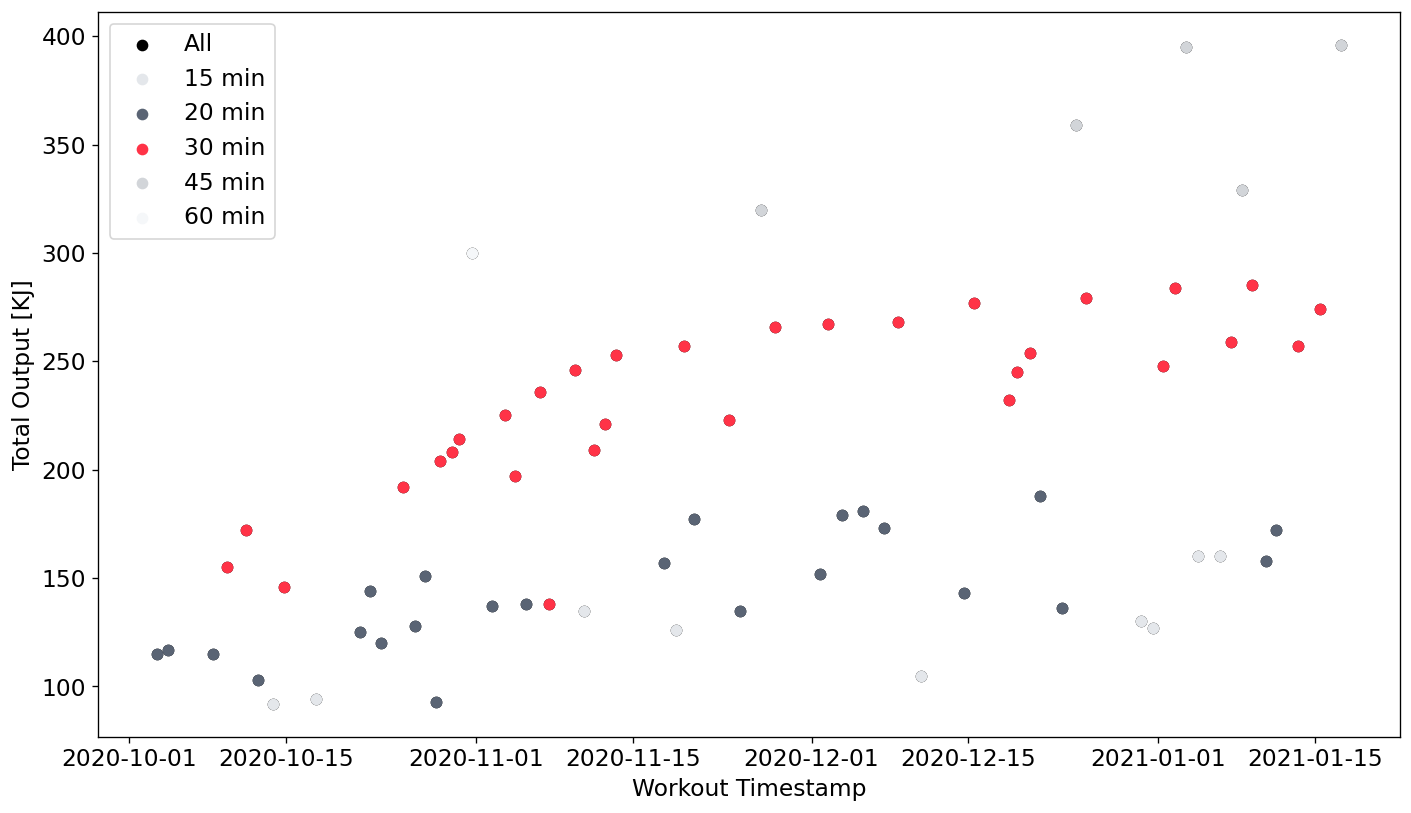

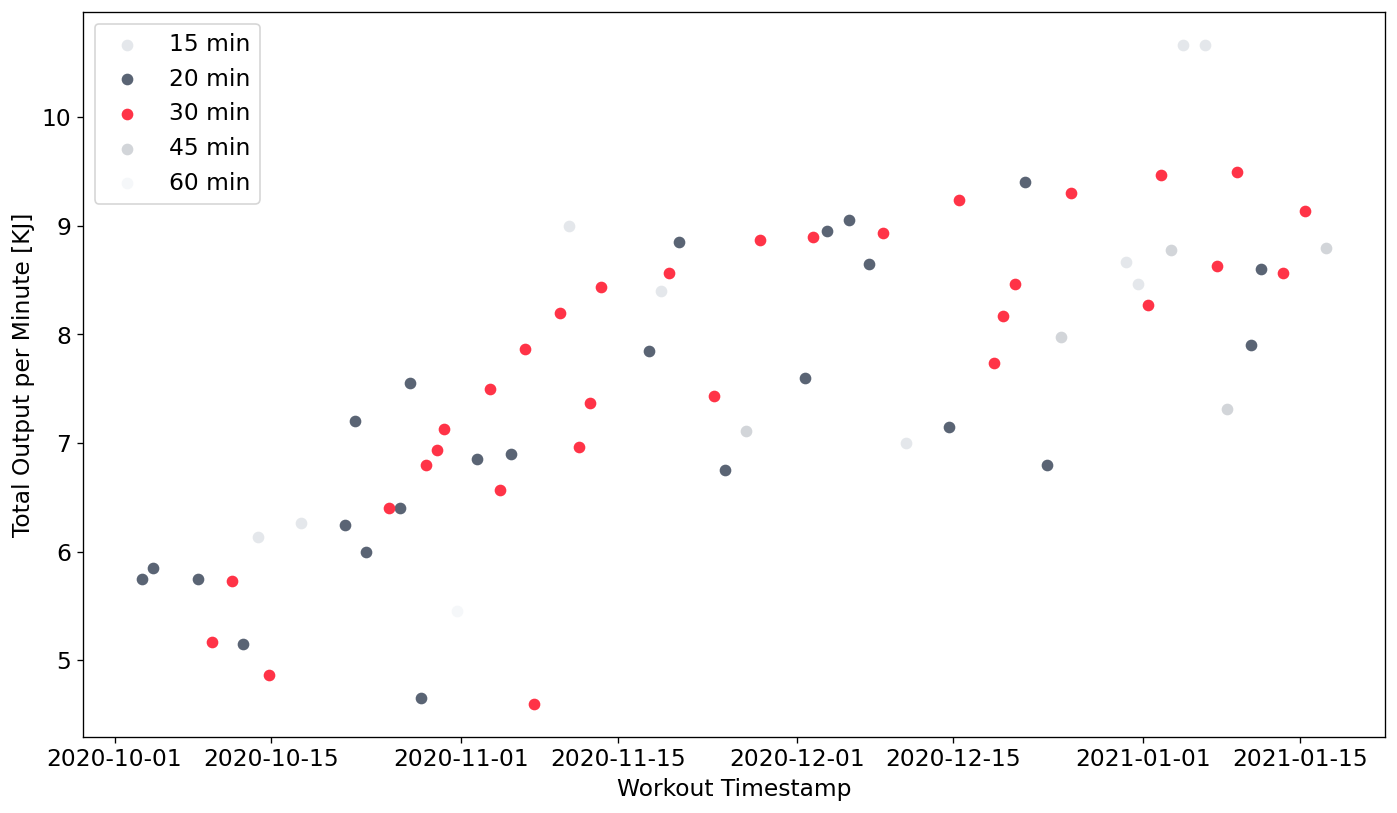

In [19]:
plot_no_normalized(xlabel="Workout Timestamp", ylabel="Total Output [KJ]", title="Total Output per Class - Not Normalized to Class Duration", data_idx=1)
plot_normalized(xlabel="Workout Timestamp", ylabel="Total Output per Minute [KJ]", title="Total Output per Class - Normalized to Class Duration", data_idx=1)    

### Average Power [Watts]

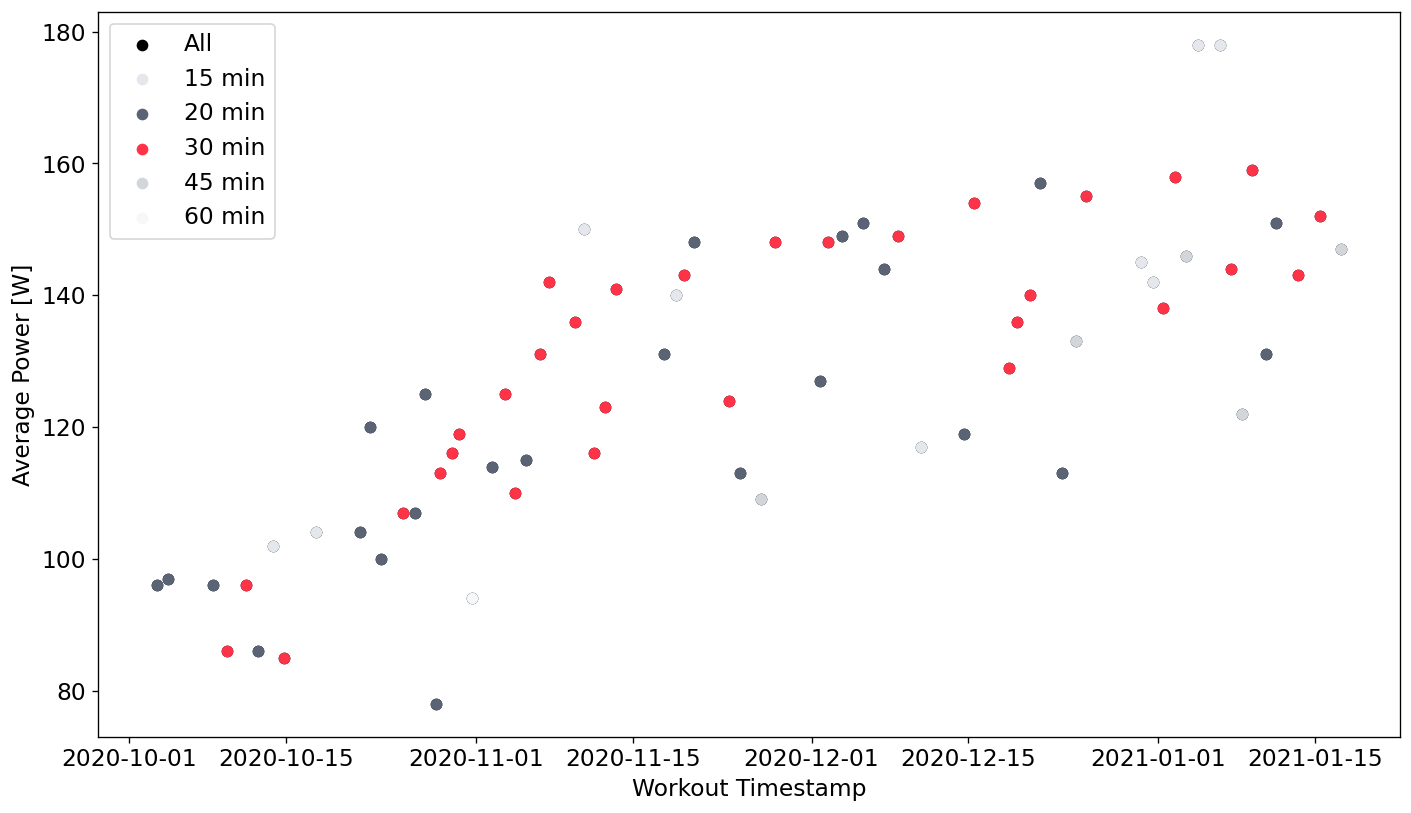

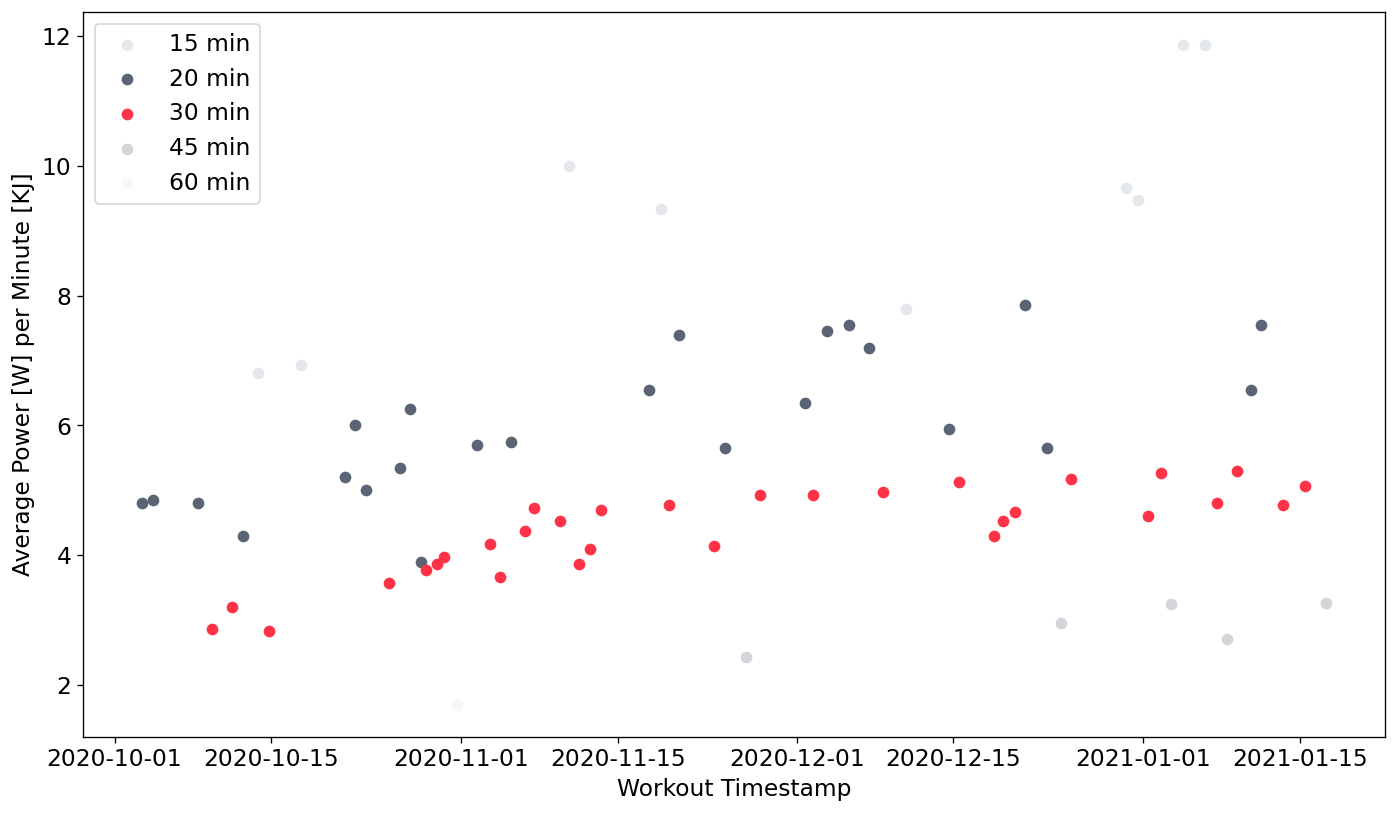

In [20]:
plot_no_normalized(xlabel="Workout Timestamp", ylabel="Average Power [W]", title="Average Power per Class - Not Normalized to Class Duration", data_idx=2)
plot_normalized(xlabel="Workout Timestamp", ylabel="Average Power [W] per Minute [KJ]", title="Average Power per Class - Normalized to Class Duration", data_idx=2)    

### Average Speed (mph)

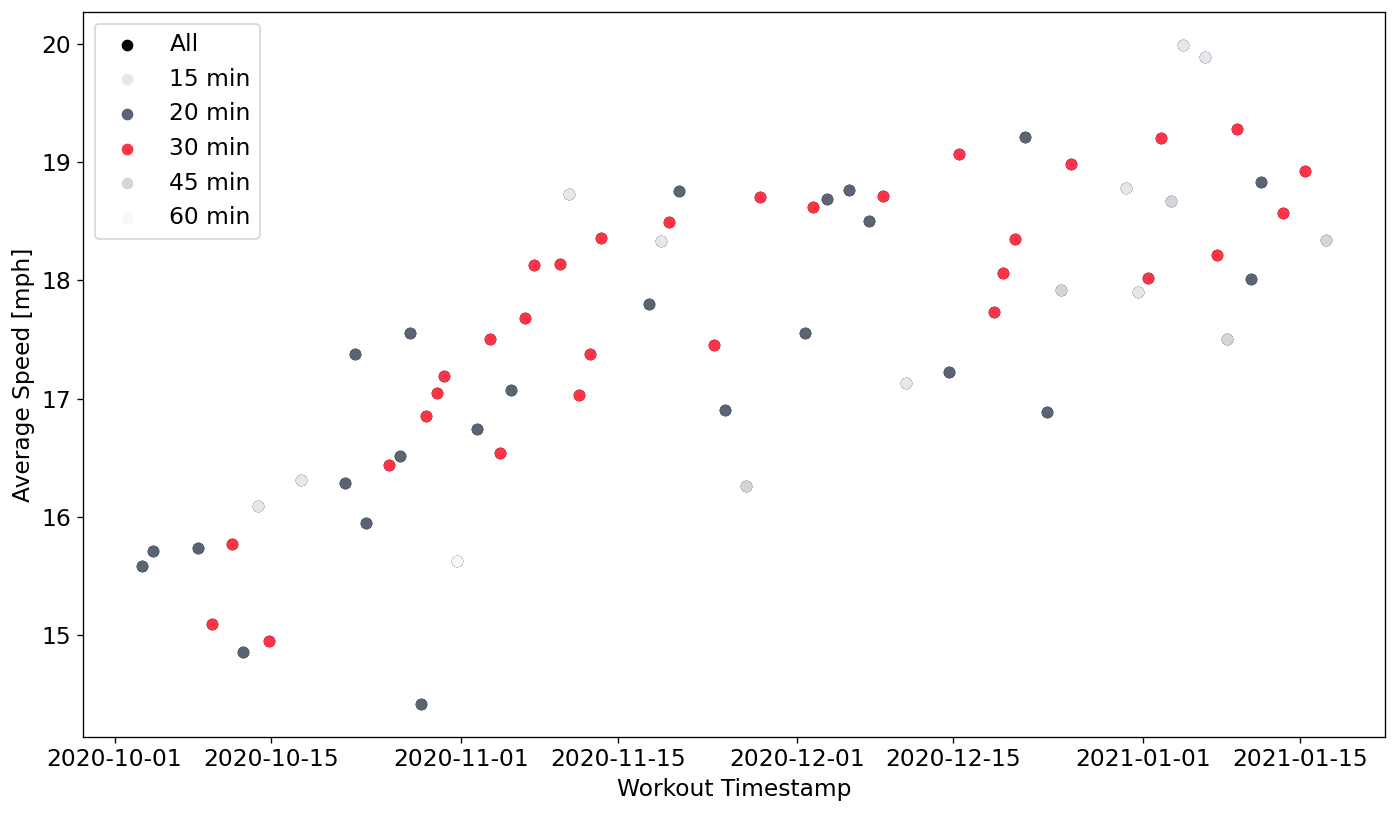

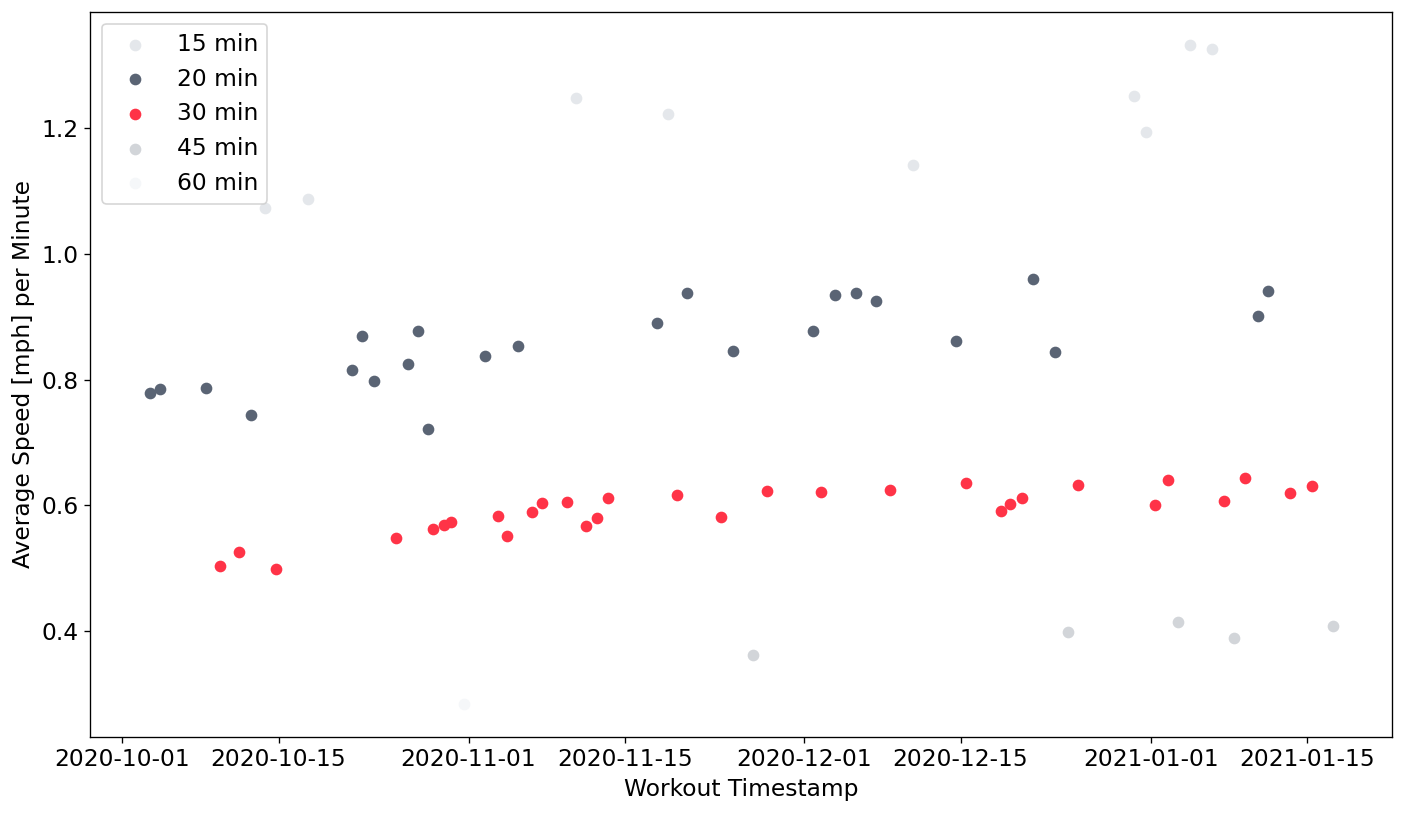

In [21]:
plot_no_normalized(xlabel="Workout Timestamp", ylabel="Average Speed [mph]", title="Average Speed per Class - Not Normalized to Class Duration", data_idx=3)
plot_normalized(xlabel="Workout Timestamp", ylabel="Average Speed [mph] per Minute", title="Average Speed per Class - Normalized to Class Duration", data_idx=3)    

### Distance (miles)

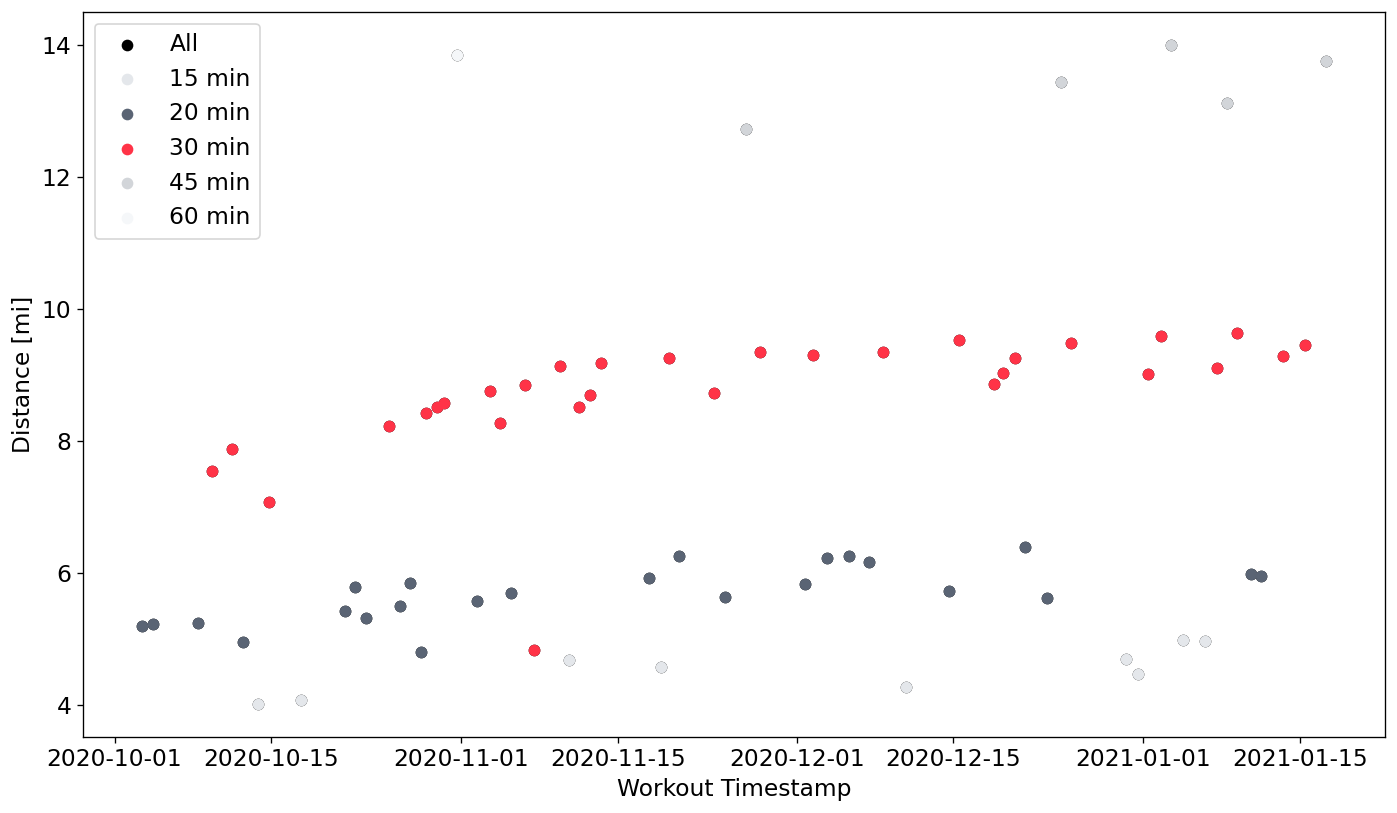

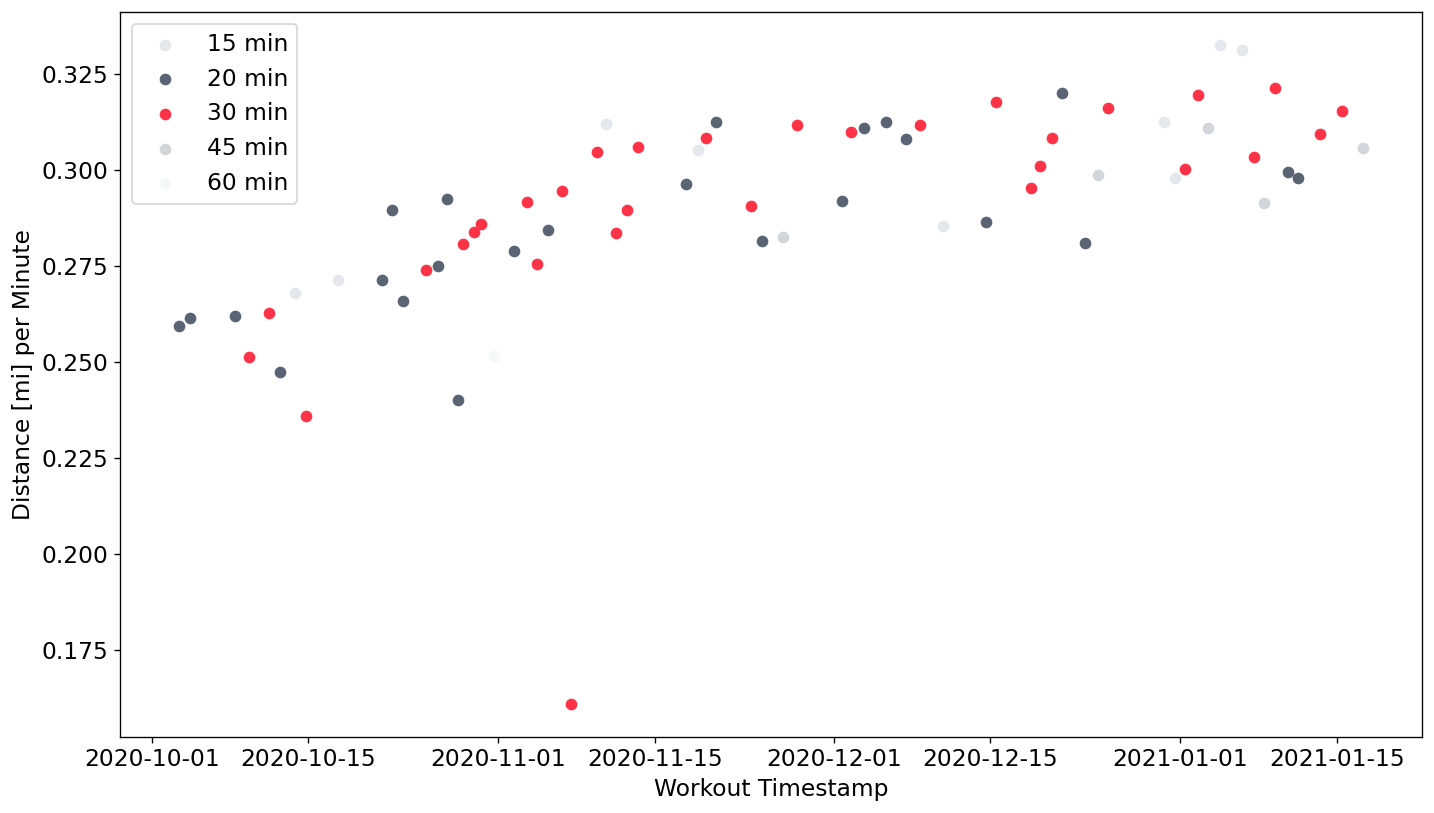

In [22]:
plot_no_normalized(xlabel="Workout Timestamp", ylabel="Distance [mi]", title="Distance Cycled per Class - Not Normalized to Class Duration", data_idx=4)
plot_normalized(xlabel="Workout Timestamp", ylabel="Distance [mi] per Minute", title="Distance Cycled per Class - Normalized to Class Duration", data_idx=4)    

### Calories Burned (kcal)

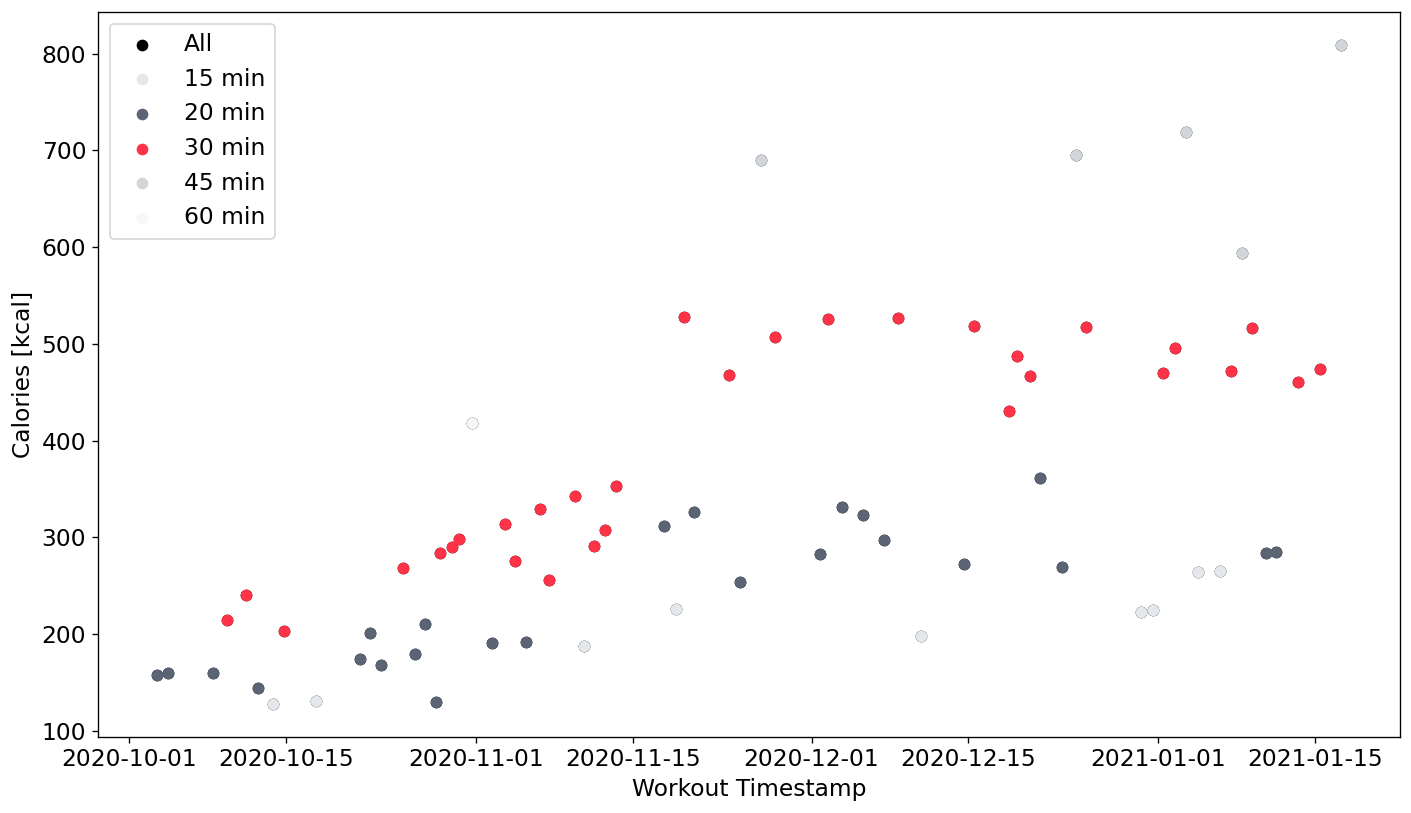

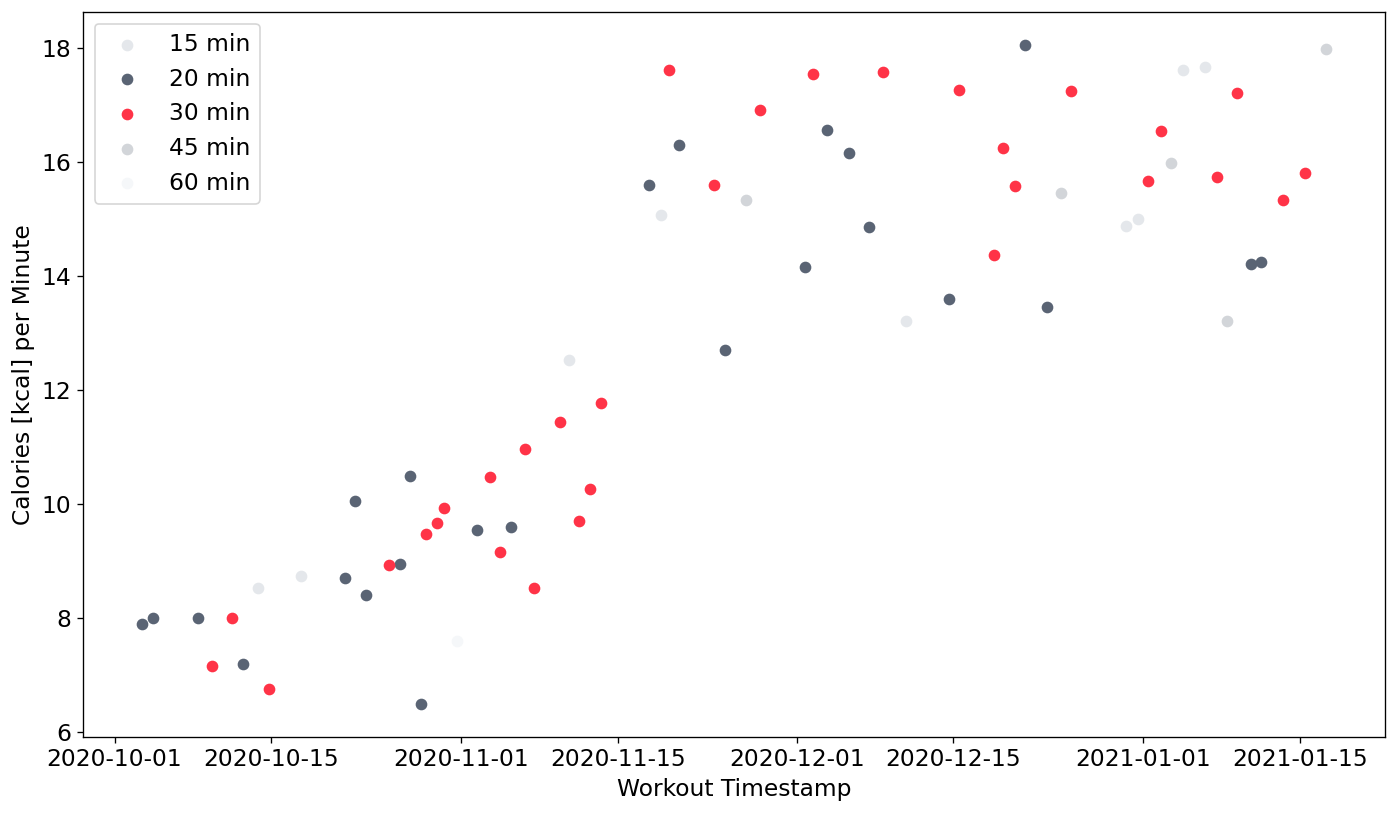

In [23]:
plot_no_normalized(xlabel="Workout Timestamp", ylabel="Calories [kcal]", title="Calories Burned per Class - Not Normalized to Class Duration", data_idx=5)
plot_normalized(xlabel="Workout Timestamp", ylabel="Calories [kcal] per Minute", title="Calories Burned per Class - Normalized to Class Duration", data_idx=5)    

### Average Resistance [0-100%]

In [24]:
def clean_pct(arr):
    arr_out = []
    for val in arr:
        arr_out.append(int(val.strip('%')))
    return np.array(arr_out)

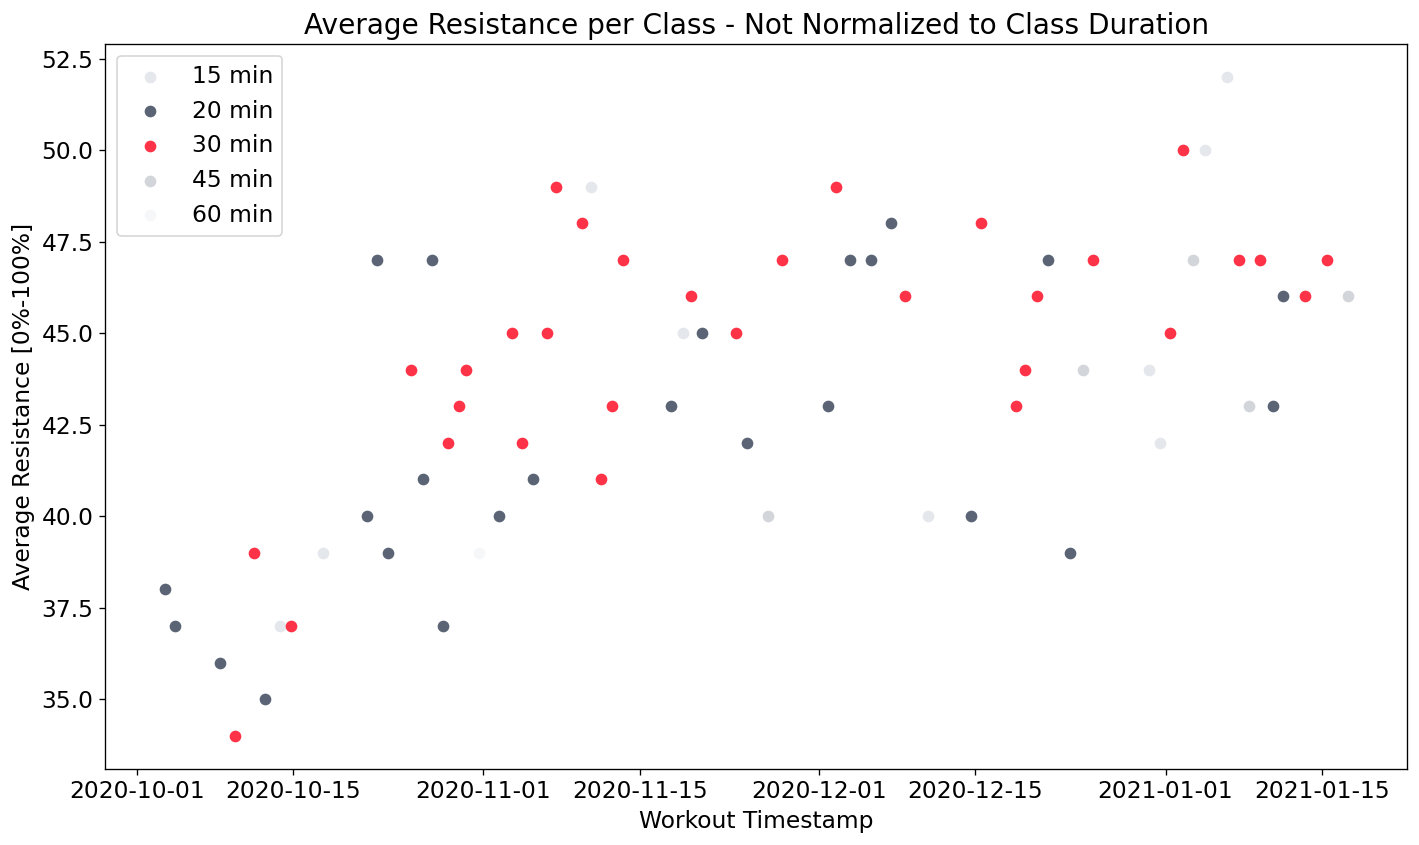

In [25]:
f, ax = plt.subplots(figsize=(14, 8), dpi= 120, facecolor='w', edgecolor='k')
plt.scatter(c15d, clean_pct(c15n[:,6]), label="15 min", color=pelo_colors[3])
plt.scatter(c20d, clean_pct(c20n[:,6]), label="20 min", color=pelo_colors[1])
plt.scatter(c30d, clean_pct(c30n[:,6]), label="30 min", color=pelo_colors[0])
plt.scatter(c45d, clean_pct(c45n[:,6]), label="45 min", color=pelo_colors[2])
plt.scatter(c60d, clean_pct(c60n[:,6]), label="60 min", color=pelo_colors[4])
plt.legend(loc='upper left')
plt.xlabel('Workout Timestamp')
plt.ylabel('Average Resistance [0%-100%]')
plt.title('Average Resistance per Class - Not Normalized to Class Duration')
plt.show()

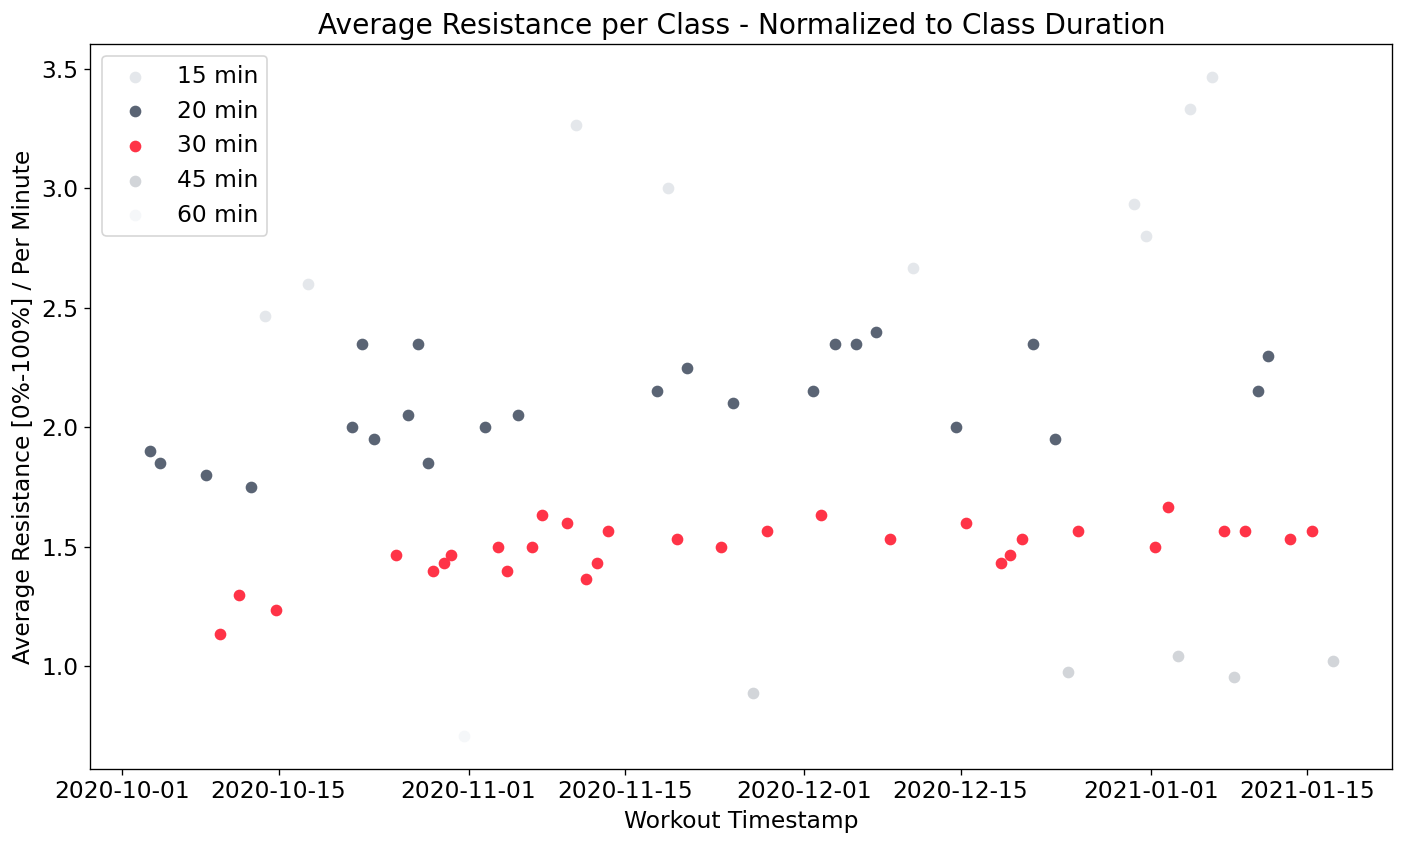

In [26]:
f, ax = plt.subplots(figsize=(14, 8), dpi= 120, facecolor='w', edgecolor='k')
plt.scatter(c15d, clean_pct(c15n[:,6])/15.0, label="15 min", color=pelo_colors[3])
plt.scatter(c20d, clean_pct(c20n[:,6])/20.0, label="20 min", color=pelo_colors[1])
plt.scatter(c30d, clean_pct(c30n[:,6])/30.0, label="30 min", color=pelo_colors[0])
plt.scatter(c45d, clean_pct(c45n[:,6])/45.0, label="45 min", color=pelo_colors[2])
plt.scatter(c60d, clean_pct(c60n[:,6])/55.0, label="60 min", color=pelo_colors[4])  # the one 60min class was actually 55 min
plt.legend(loc='upper left')
plt.xlabel('Workout Timestamp')
plt.ylabel('Average Resistance [0%-100%] / Per Minute')
plt.title('Average Resistance per Class - Normalized to Class Duration')
plt.show()

### Average Cadence (RPM)

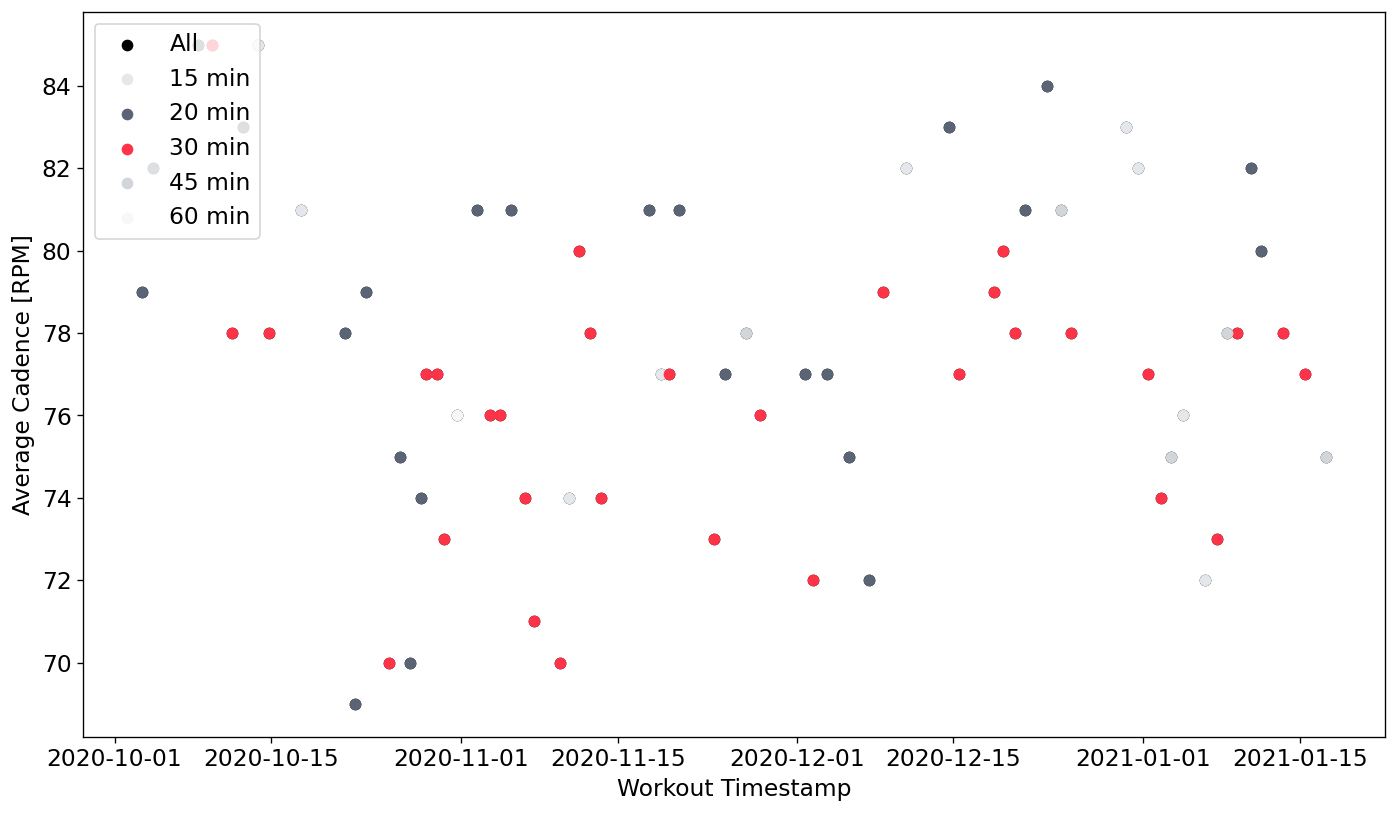

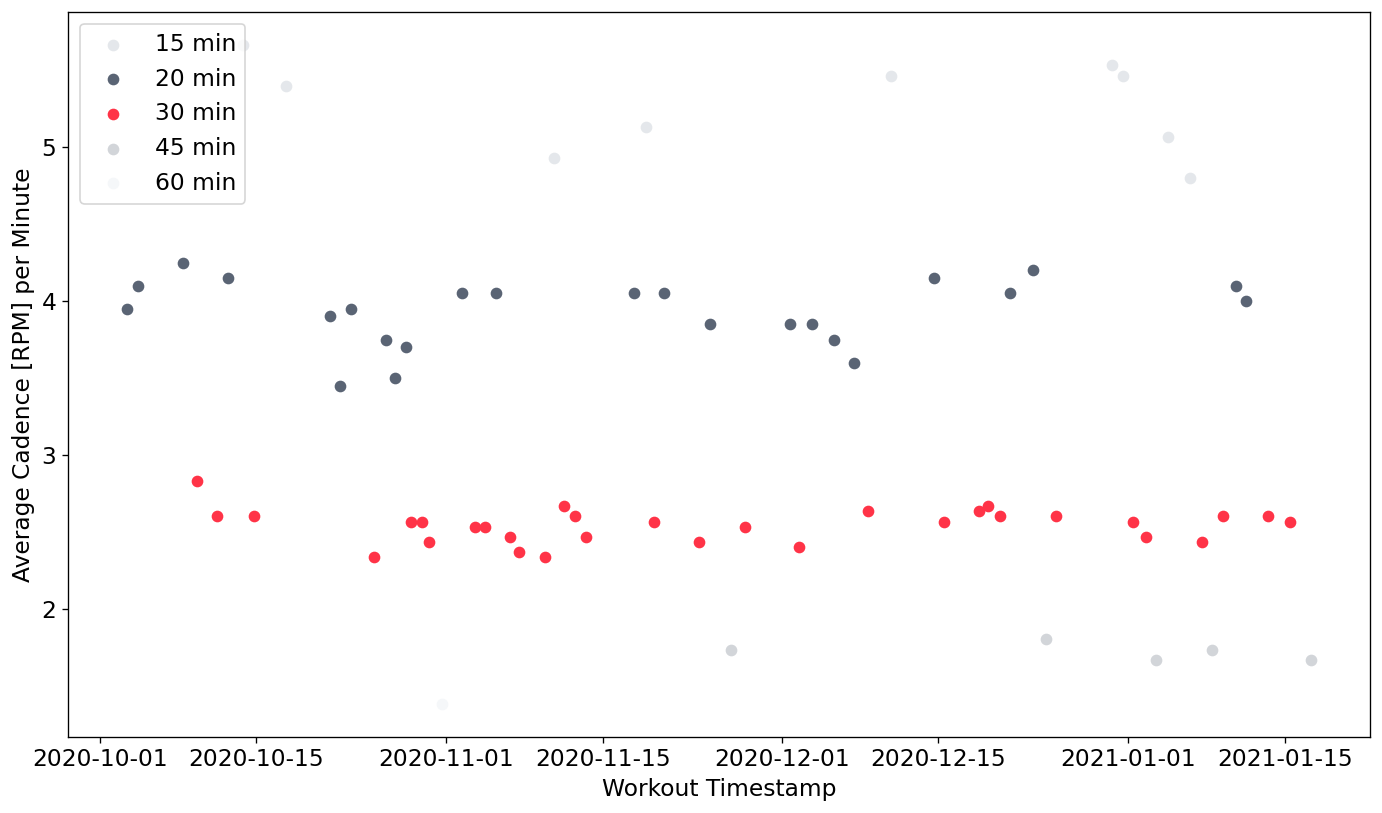

In [27]:
plot_no_normalized(xlabel="Workout Timestamp", ylabel="Average Cadence [RPM]", title="Average Cadence per Class - Not Normalized to Class Duration", data_idx=7)
plot_normalized(xlabel="Workout Timestamp", ylabel="Average Cadence [RPM] per Minute", title="Average Cadence per Class - Normalized to Class Duration", data_idx=7)    

### Average Heart Rate (BPM)

In [28]:
def clear_nans(arr):  # to clear NaNs from Heart Rate Data because numpy's nan_to_num not working
    arr_out = []
    for val in arr:
        if val > 0:
            arr_out.append(val)
        else: 
            arr_out.append(125.0)
    return np.array([arr_out])

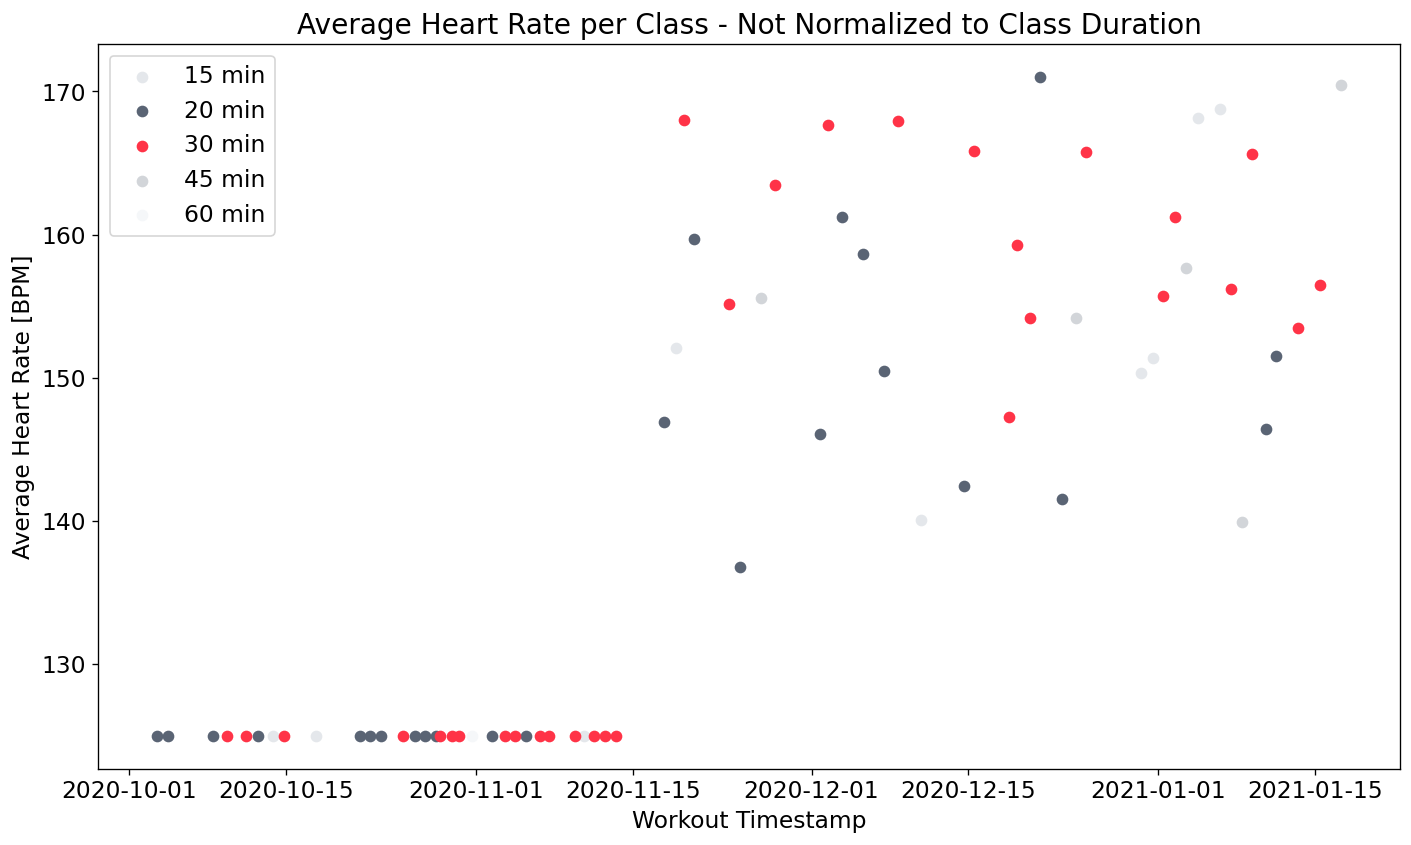

In [29]:
f, ax = plt.subplots(figsize=(14, 8), dpi= 120, facecolor='w', edgecolor='k')
plt.scatter(c15d, clear_nans(c15n[:,8]), label="15 min", color=pelo_colors[3])
plt.scatter(c20d, clear_nans(c20n[:,8]), label="20 min", color=pelo_colors[1])
plt.scatter(c30d, clear_nans(c30n[:,8]), label="30 min", color=pelo_colors[0])
plt.scatter(c45d, clear_nans(c45n[:,8]), label="45 min", color=pelo_colors[2])
plt.scatter(c60d, clear_nans(c60n[:,8]), label="60 min", color=pelo_colors[4])
plt.legend(loc='upper left')
plt.xlabel('Workout Timestamp')
plt.ylabel('Average Heart Rate [BPM]')
plt.title('Average Heart Rate per Class - Not Normalized to Class Duration')
plt.savefig("100_rides/metric_heartrate.png", format="png")
plt.show()

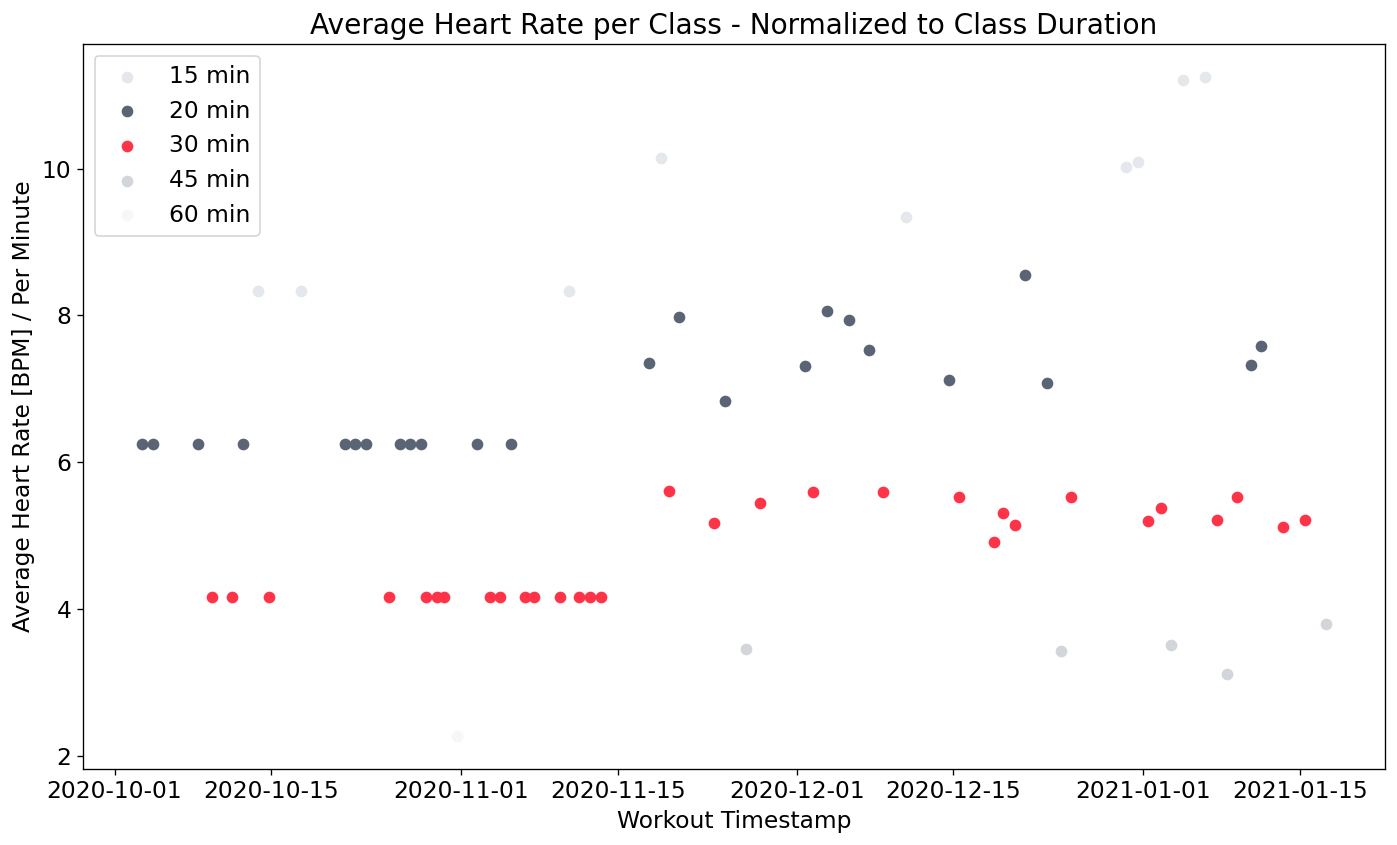

In [30]:
f, ax = plt.subplots(figsize=(14, 8), dpi= 120, facecolor='w', edgecolor='k')
plt.scatter(c15d, clear_nans(c15n[:,8])/15.0, label="15 min", color=pelo_colors[3])
plt.scatter(c20d, clear_nans(c20n[:,8])/20.0, label="20 min", color=pelo_colors[1])
plt.scatter(c30d, clear_nans(c30n[:,8])/30.0, label="30 min", color=pelo_colors[0])
plt.scatter(c45d, clear_nans(c45n[:,8])/45.0, label="45 min", color=pelo_colors[2])
plt.scatter(c60d, clear_nans(c60n[:,8])/55.0, label="60 min", color=pelo_colors[4])  # the one 60min class was actually 55 min
plt.legend(loc='upper left')
plt.xlabel('Workout Timestamp')
plt.ylabel('Average Heart Rate [BPM] / Per Minute')
plt.title('Average Heart Rate per Class - Normalized to Class Duration')
plt.savefig("100_rides/metric_norm_heartrate.png", format="png")
plt.show()

## Which instructor pushes me the hardest?

In [31]:
def metric_by_instructor(metric="Total Output"):
    # Mean 
    met_mean = ccc.groupby(["Instructor Name"])[metric].mean().sort_values(ascending=False)
    #c15.groupby(["Instructor Name"])[metric].mean().sort_values(ascending=False).to_frame()
    #c20.groupby(["Instructor Name"])[metric].mean().sort_values(ascending=False).to_frame()
    #c30.groupby(["Instructor Name"])[metric].mean().sort_values(ascending=False).to_frame()
    #c45.groupby(["Instructor Name"])[metric].mean().sort_values(ascending=False).to_frame()
    #c60.groupby(["Instructor Name"])[metric].mean().sort_values(ascending=False).to_frame()
    
    # Max
    met_max = ccc.groupby(["Instructor Name"])[metric].max().sort_values(ascending=False)
    #c15.groupby(["Instructor Name"])[metric].max().sort_values(ascending=False).to_frame()
    #c20.groupby(["Instructor Name"])[metric].max().sort_values(ascending=False).to_frame()
    #c30.groupby(["Instructor Name"])[metric].max().sort_values(ascending=False).to_frame()
    #c45.groupby(["Instructor Name"])[metric].max().sort_values(ascending=False).to_frame()
    #c60.groupby(["Instructor Name"])[metric].max().sort_values(ascending=False).to_frame()
    
    return met_mean, met_max

In [32]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [33]:
met_mean, met_max = metric_by_instructor(metric="Avg. Watts")

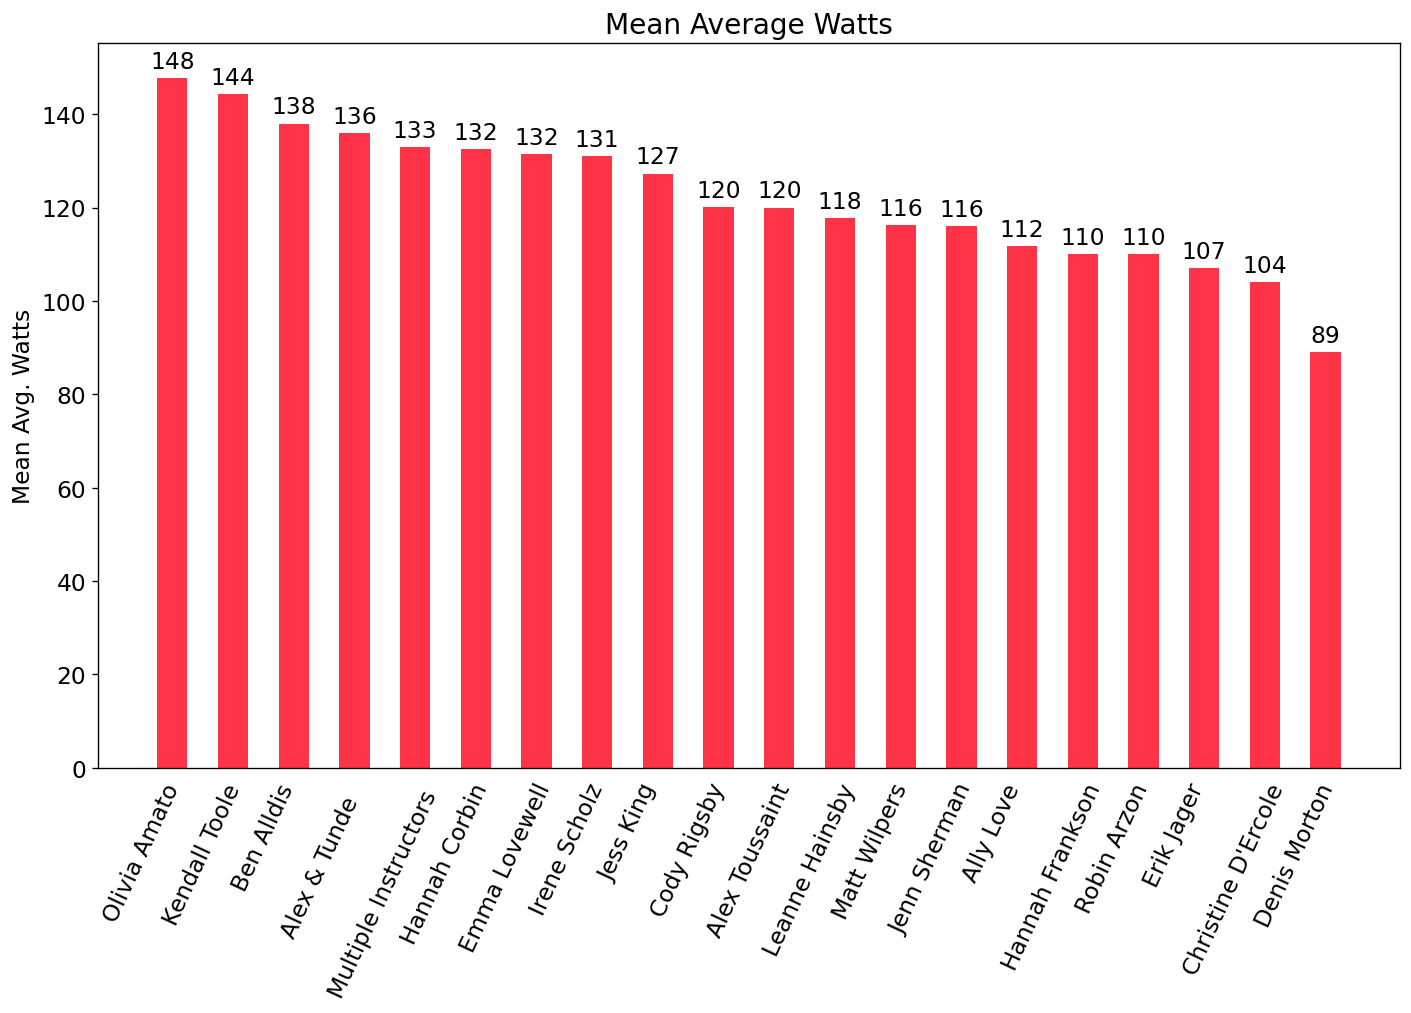

,Instructor,Mean Avg. Watts
0,Olivia Amato,147.833333
1,Kendall Toole,144.333333
2,Ben Alldis,138.000000
3,Alex & Tunde,136.000000
4,Multiple Instructors,133.000000


In [34]:
y = met_mean
met_mean = pd.DataFrame({"Instructor":met_mean.index, "Mean Avg. Watts":met_mean.values}).reset_index(drop=True) 

labels = met_mean["Instructor"]

x = np.arange(len(y))  # the label locations

width = 0.5  # the width of the bars


fig, ax = plt.subplots(figsize=(14, 8), dpi= 120)
#rects1 = ax.bar(x - width/2, y, width, label='Avg. Watts')
rects1 = ax.bar(x+width, y, width, label='Avg. Watts')

ax.set_ylabel('Mean Avg. Watts')
ax.set_title("Mean Average Watts")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=65)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

#ax.legend()
autolabel(rects1)
plt.savefig("100_rides/metric_mean_avg_watts.png", format="png")
plt.show()

met_mean.head()

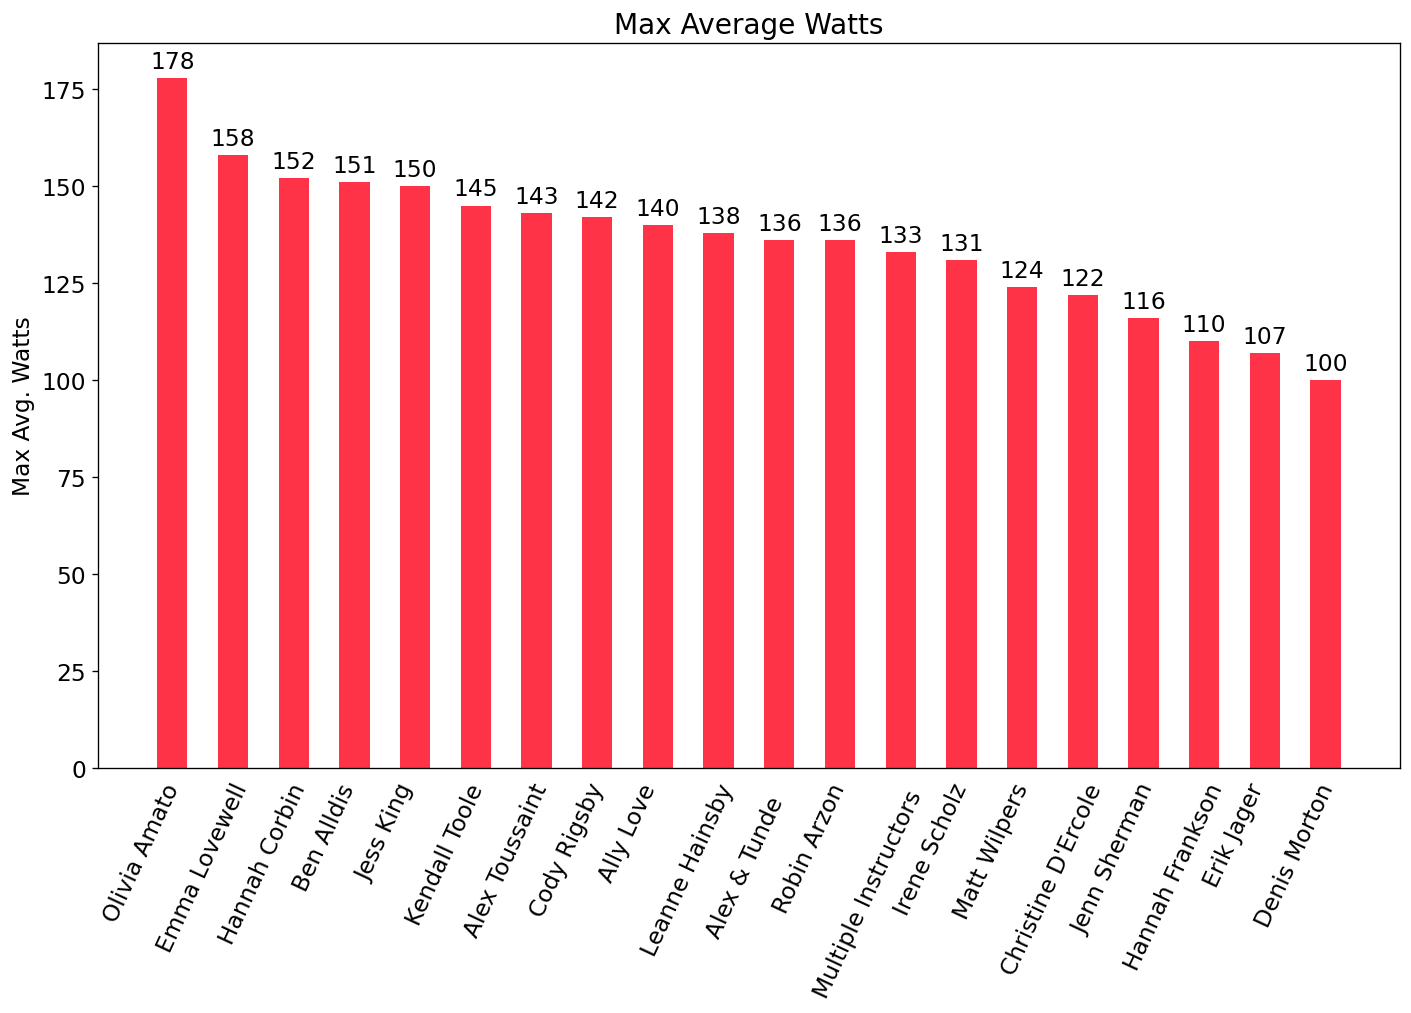

,Instructor,Max Avg. Watts
0,Olivia Amato,178.0
1,Emma Lovewell,158.0
2,Hannah Corbin,152.0
3,Ben Alldis,151.0
4,Jess King,150.0


In [35]:
y = met_max
met_max = pd.DataFrame({"Instructor":met_max.index, "Max Avg. Watts":met_max.values}).reset_index(drop=True) 

labels = met_max["Instructor"]

x = np.arange(len(y))  # the label locations

width = 0.5  # the width of the bars


fig, ax = plt.subplots(figsize=(14, 8), dpi= 120)
#rects1 = ax.bar(x - width/2, y, width, label='Avg. Watts')
rects1 = ax.bar(x+width, y, width, label='Avg. Watts')

ax.set_ylabel('Max Avg. Watts')
ax.set_title("Max Average Watts")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=65)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

#ax.legend()
autolabel(rects1)
plt.savefig("100_rides/metric_max_avg_watts.png", format="png")
plt.show()

met_max.head()

In [36]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [37]:
met_mean, met_max = metric_by_instructor(metric="Avg. Speed (mph)")

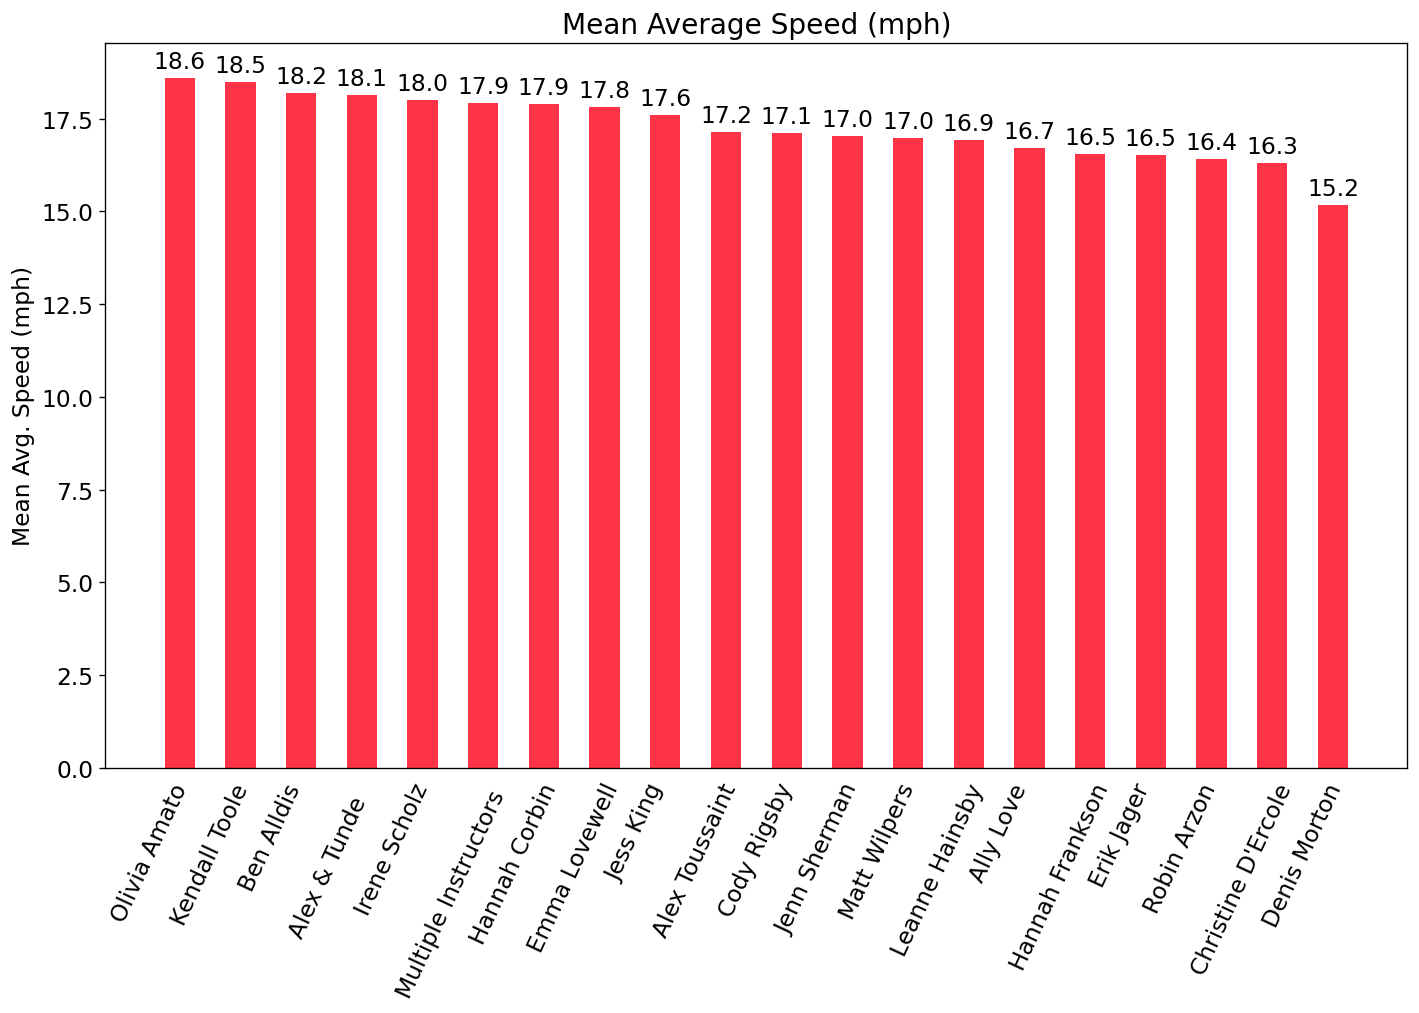

,Instructor,Mean Avg. Speed (mph)
0,Olivia Amato,18.608333
1,Kendall Toole,18.496667
2,Ben Alldis,18.190000
3,Alex & Tunde,18.140000
4,Irene Scholz,18.010000


In [38]:
y = met_mean
met_mean = pd.DataFrame({"Instructor":met_mean.index, "Mean Avg. Speed (mph)":met_mean.values}).reset_index(drop=True) 

labels = met_mean["Instructor"]

x = np.arange(len(y))  # the label locations

width = 0.5  # the width of the bars


fig, ax = plt.subplots(figsize=(14, 8), dpi= 120)
#rects1 = ax.bar(x - width/2, y, width, label='Avg. Watts')
rects1 = ax.bar(x+width, y, width, label='Avg. Speed (mph)')

ax.set_ylabel('Mean Avg. Speed (mph)')
ax.set_title("Mean Average Speed (mph)")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=65)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

#ax.legend()
autolabel(rects1)
plt.savefig("100_rides/metric_mean_avg_speed.png", format="png")
plt.show()

met_mean.head()

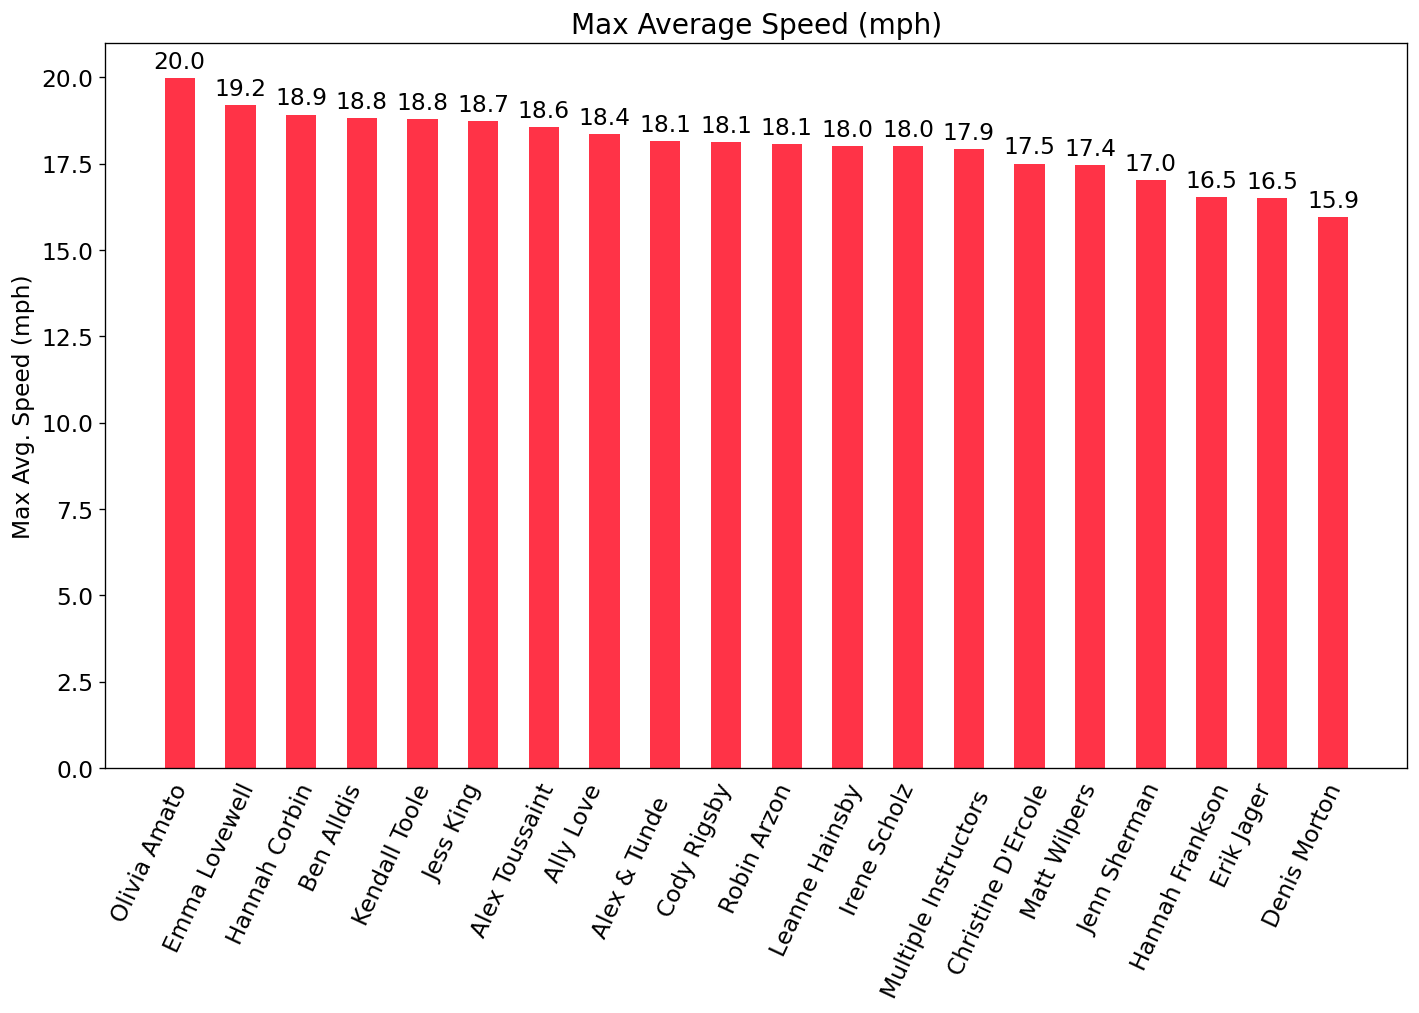

,Instructor,Max Avg. Speed (mph)
0,Olivia Amato,19.99
1,Emma Lovewell,19.20
2,Hannah Corbin,18.92
3,Ben Alldis,18.83
4,Kendall Toole,18.78


In [39]:
y = met_max
met_max = pd.DataFrame({"Instructor":met_max.index, "Max Avg. Speed (mph)":met_max.values}).reset_index(drop=True) 

labels = met_max["Instructor"]

x = np.arange(len(y))  # the label locations

width = 0.5  # the width of the bars


fig, ax = plt.subplots(figsize=(14, 8), dpi= 120)
#rects1 = ax.bar(x - width/2, y, width, label='Avg. Watts')
rects1 = ax.bar(x+width, y, width, label='Avg. Watts')

ax.set_ylabel('Max Avg. Speed (mph)')
ax.set_title("Max Average Speed (mph)")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=65)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

#ax.legend()
autolabel(rects1)
plt.savefig("100_rides/metric_max_avg_speed.png", format="png")
plt.show()

met_max.head()

# Word Cloud of Class Titles

In [40]:
text = " ".join(title for title in df[df["Fitness Discipline"]=="Cycling"].Title)  # If only cycling class titles
text = " ".join(title for title in df.Title)  # more interesting, includes all classes
stopwords = set(STOPWORDS)
stopwords.update(["min", "30", "20", "45", "15", "5", "10"])

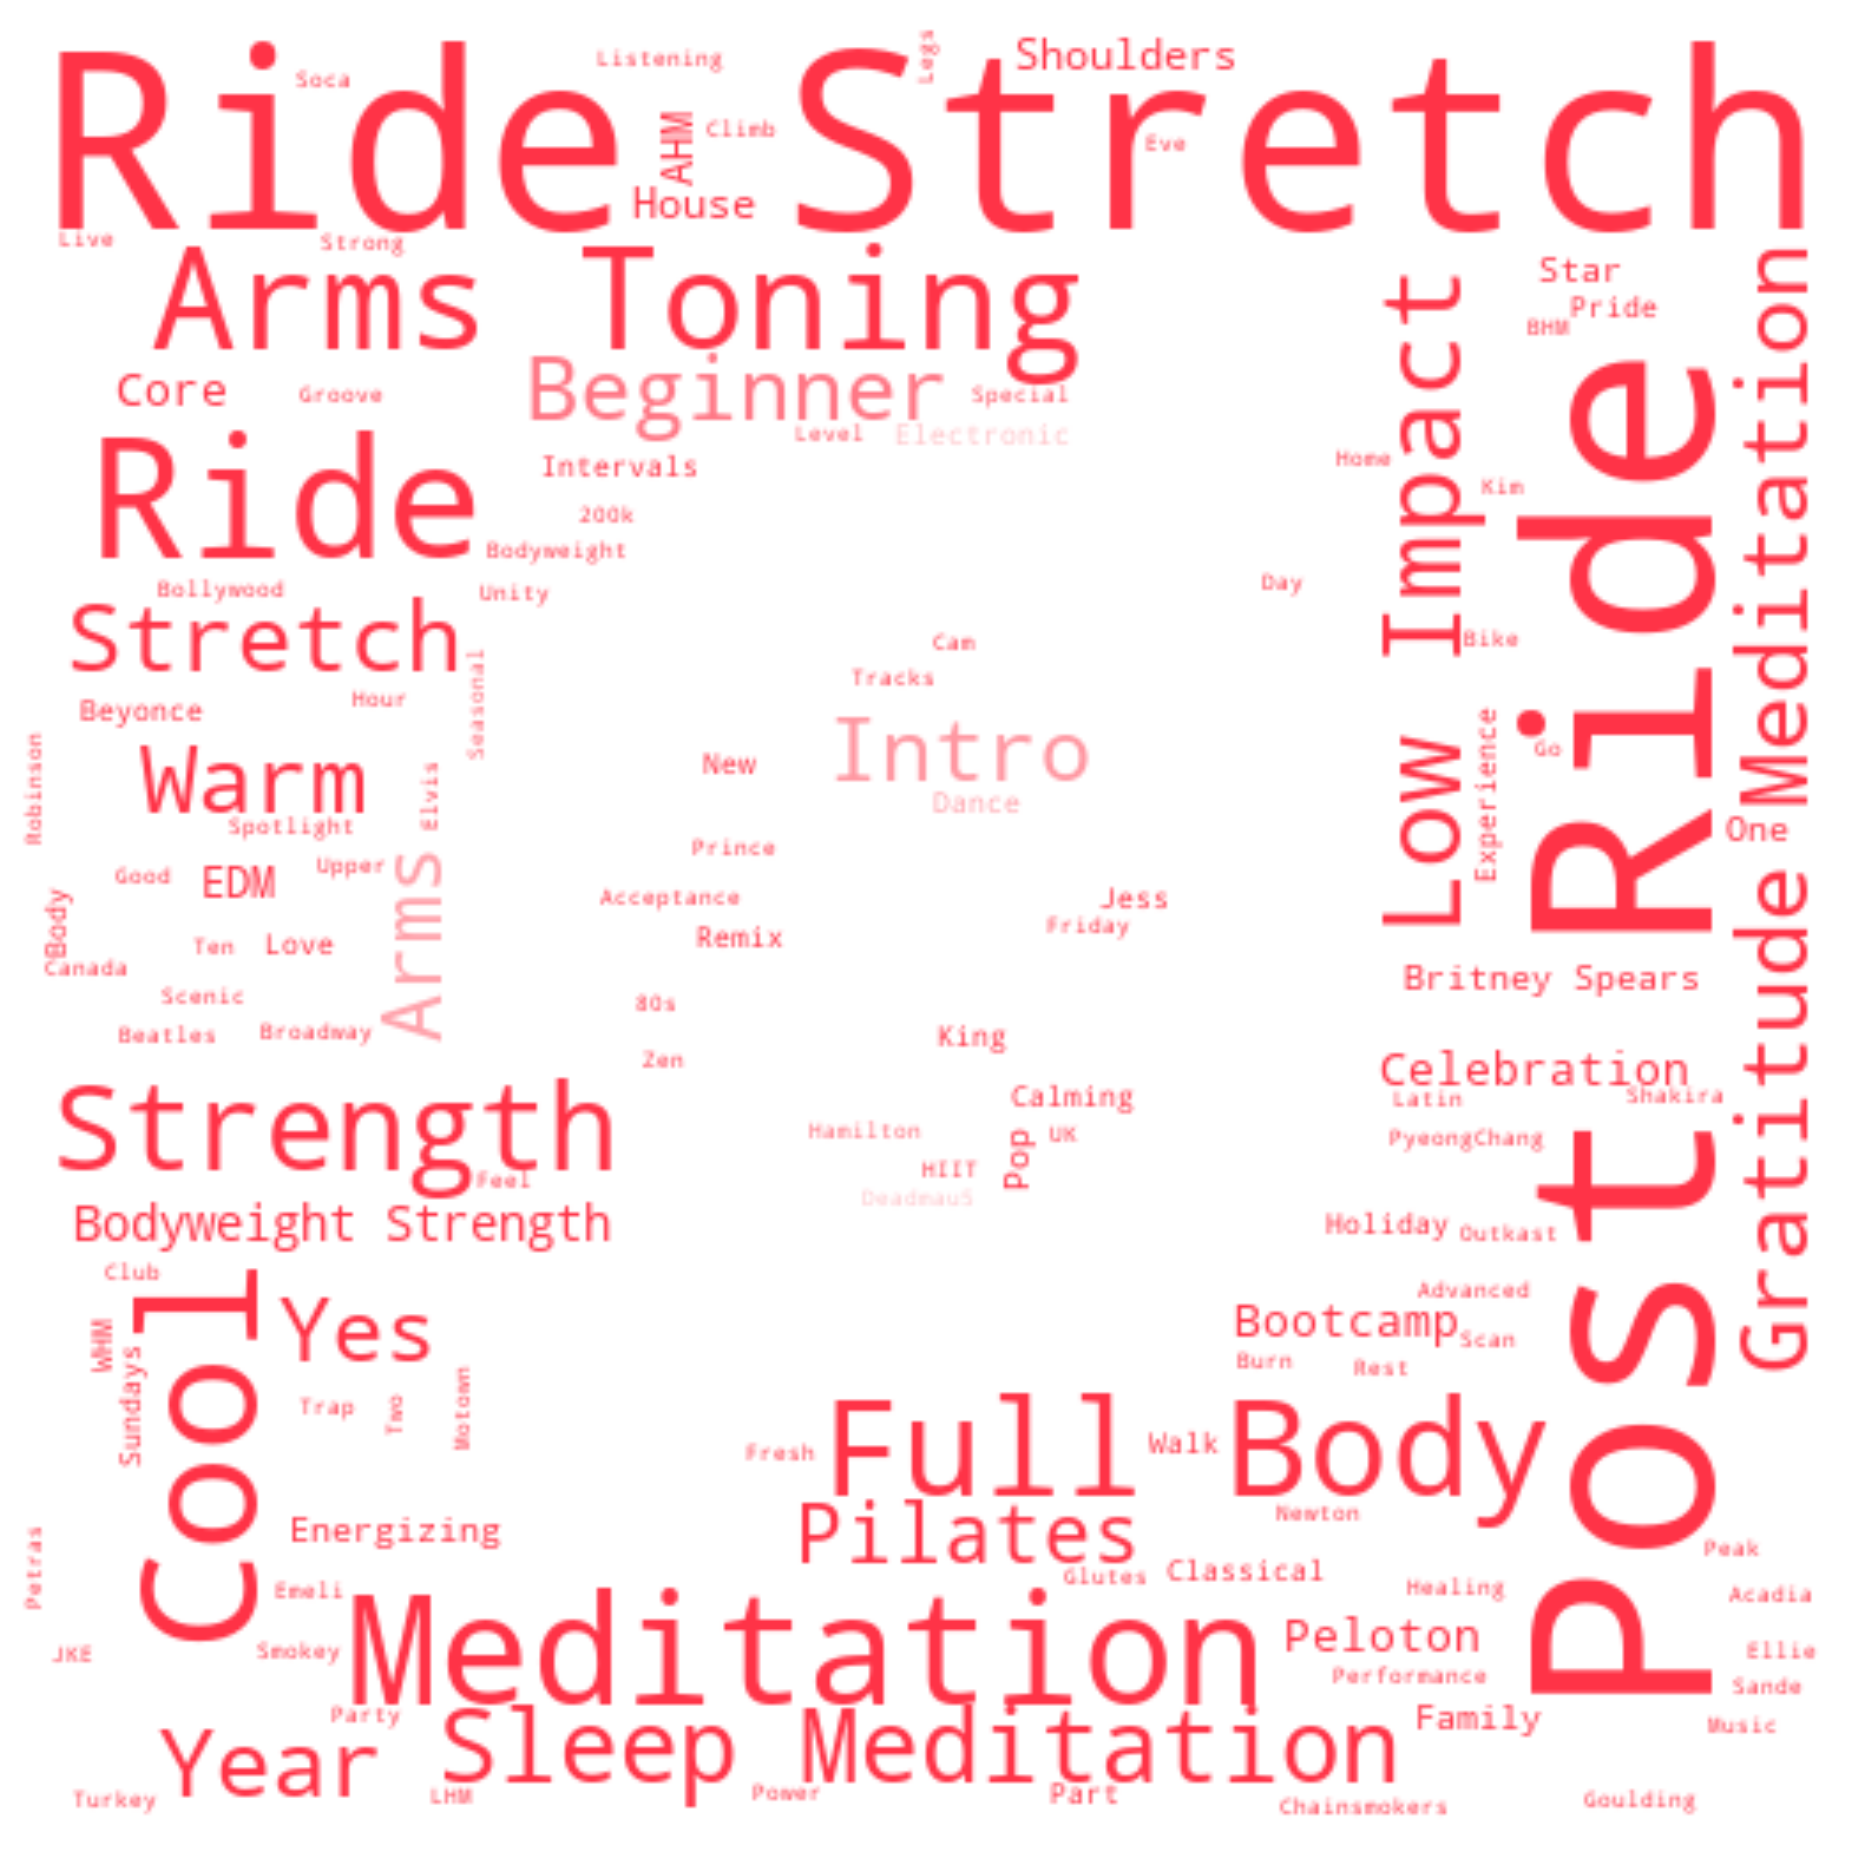

In [42]:
# Generate a word cloud image
mask = np.array(Image.open("100_rides/peloton_logo_mask.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12], dpi= 200)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

#plt.savefig("100_rides/wordcloud.png", format="png")
plt.show()